<a href="https://colab.research.google.com/github/monifonse/Deber/blob/main/CASO.PRACTICO.MONICA.FONSECA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sn

In [2]:
ruta_archivo = '/content/MilkProduction.csv'

In [3]:
df = pd.read_csv('/content/MilkProduction.csv')

In [4]:
print(df)

        Date  Production
0    1962-01         589
1    1962-02         561
2    1962-03         640
3    1962-04         656
4    1962-05         727
..       ...         ...
163  1975-08         858
164  1975-09         817
165  1975-10         827
166  1975-11         797
167  1975-12         843

[168 rows x 2 columns]


In [5]:
dt_ind = pd.read_csv('/content/MilkProduction.csv', parse_dates=['Date'], index_col='Date')

In [6]:
dt = dt_ind.copy()
dt.head()

Production
Date                  
1962-01-01         589
1962-02-01         561
1962-03-01         640
1962-04-01         656
1962-05-01         727

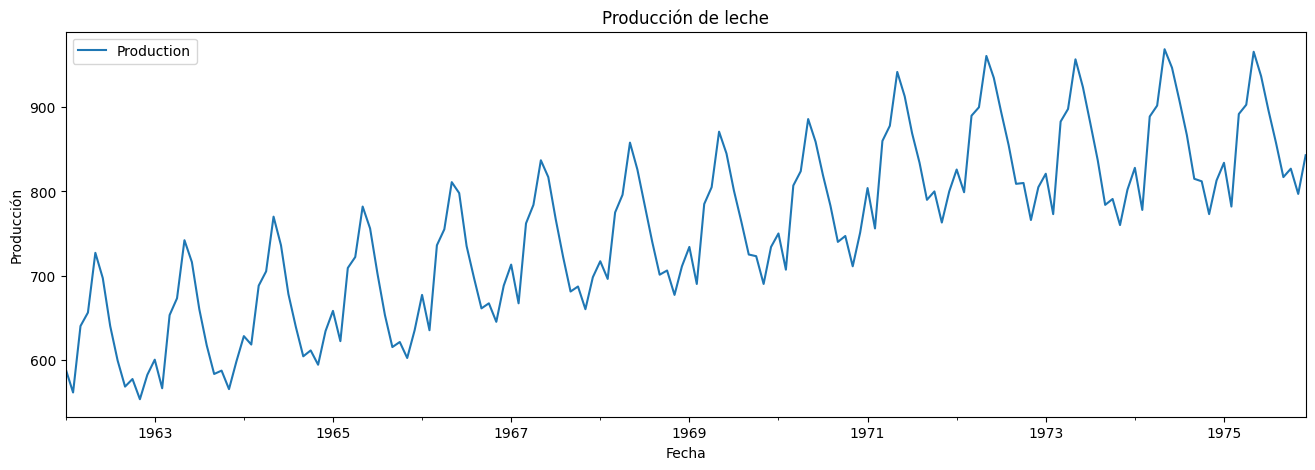

In [7]:
ax = dt.plot(figsize=(16,5), title='Producción de leche');
ax.set_xlabel("Fecha");
ax.set_ylabel("Producción");

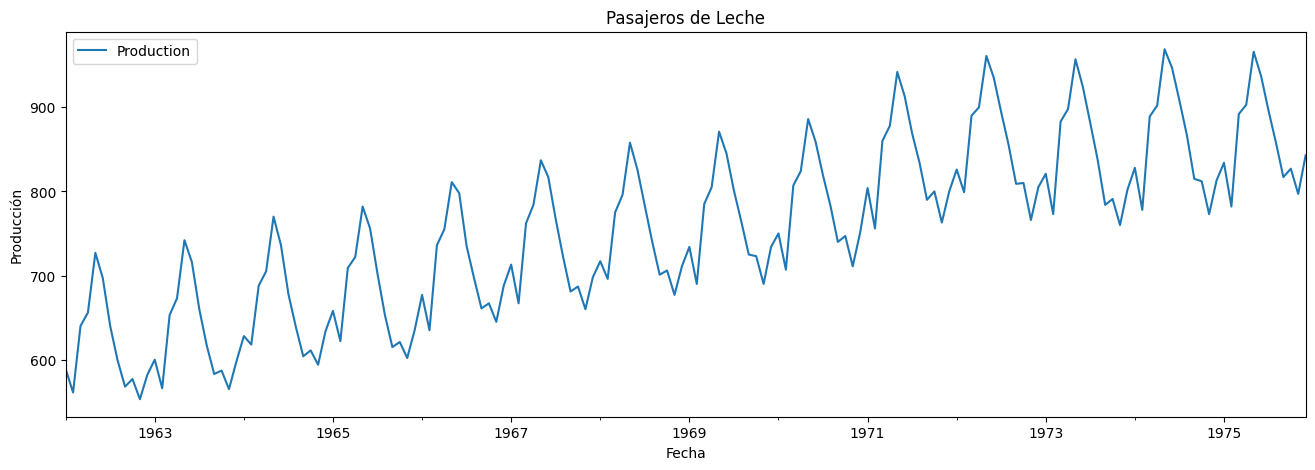

In [8]:
START_YEAR = 1962
END_YEAR = 1975

dt_zoom = dt[(dt.index.year >= START_YEAR) & (dt.index.year <= END_YEAR)]

ax = dt_zoom.plot(figsize=(16,5), title='Pasajeros de Leche');
ax.set_xlabel("Fecha");
ax.set_ylabel("Producción");

DESCOMPONIENDO UNA SERIE TEMPORAL

In [9]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

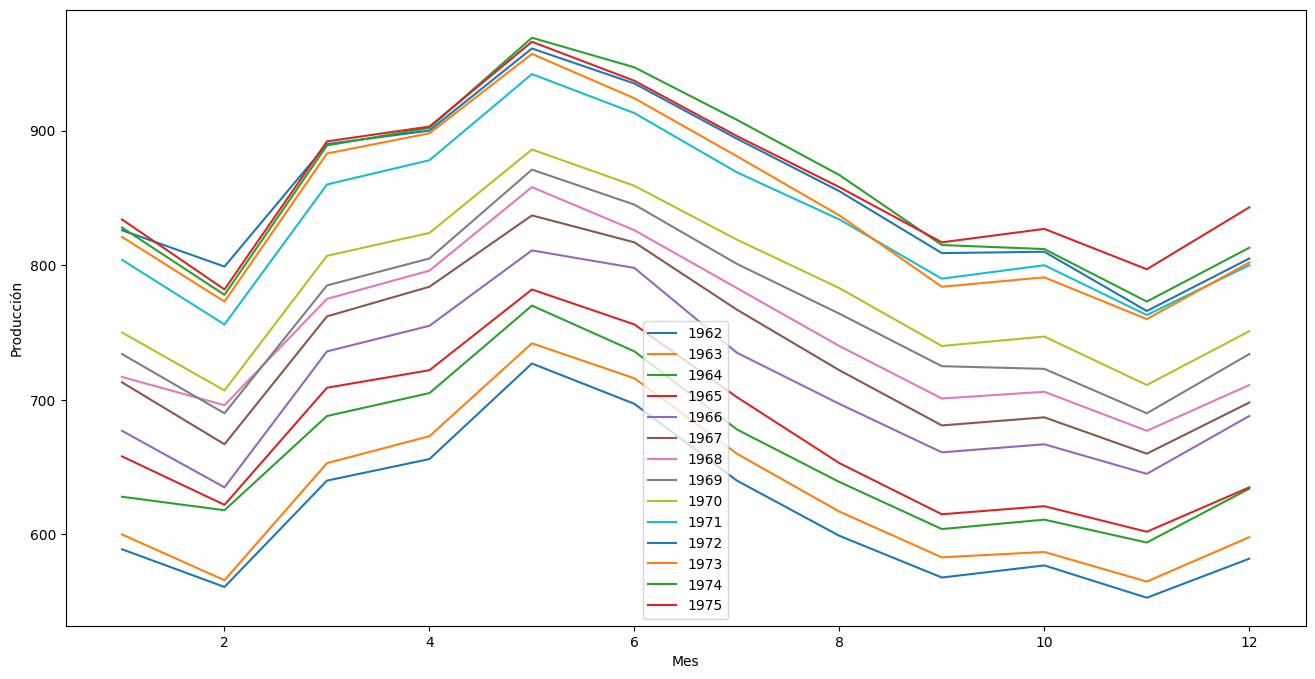

In [10]:
dt_agg = dt.copy()
dt_agg['year'] = dt.index.year
dt_agg['month'] = dt.index.month
dt_pivot = pd.pivot_table(dt_agg, values='Production', index='month', columns='year', aggfunc='mean')
dt_pivot.plot(figsize=(16,8))
plt.legend()
plt.xlabel('Mes')
plt.ylabel('Producción')
plt.show()

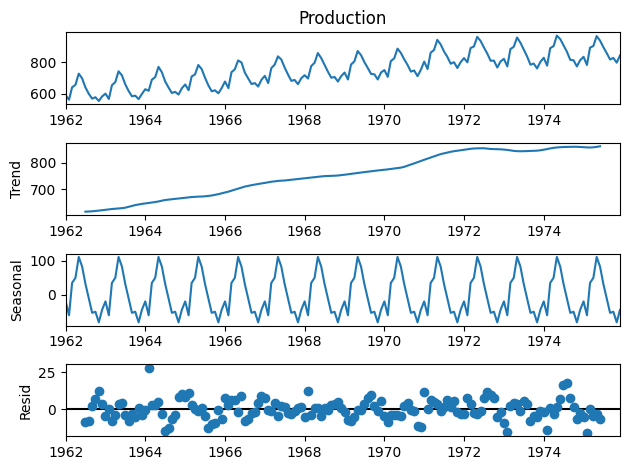

In [11]:
additive = seasonal_decompose(dt['Production'], model='additive', period=12)
additive.plot()
plt.show();

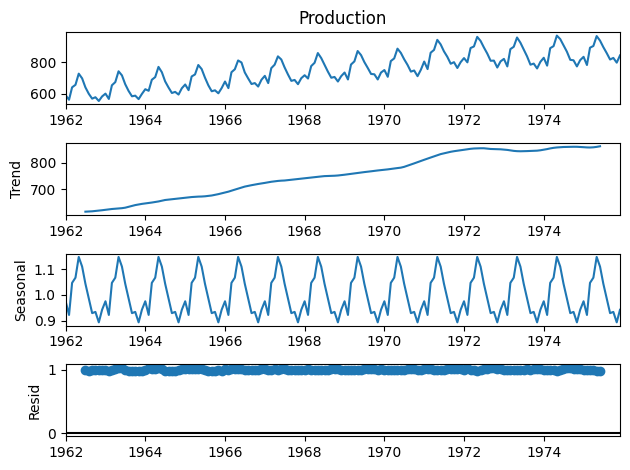

In [12]:
multiplicative = seasonal_decompose(dt['Production'], model='multiplicative', period=12)
multiplicative.plot();
plt.show();

In [13]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf, pacf

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


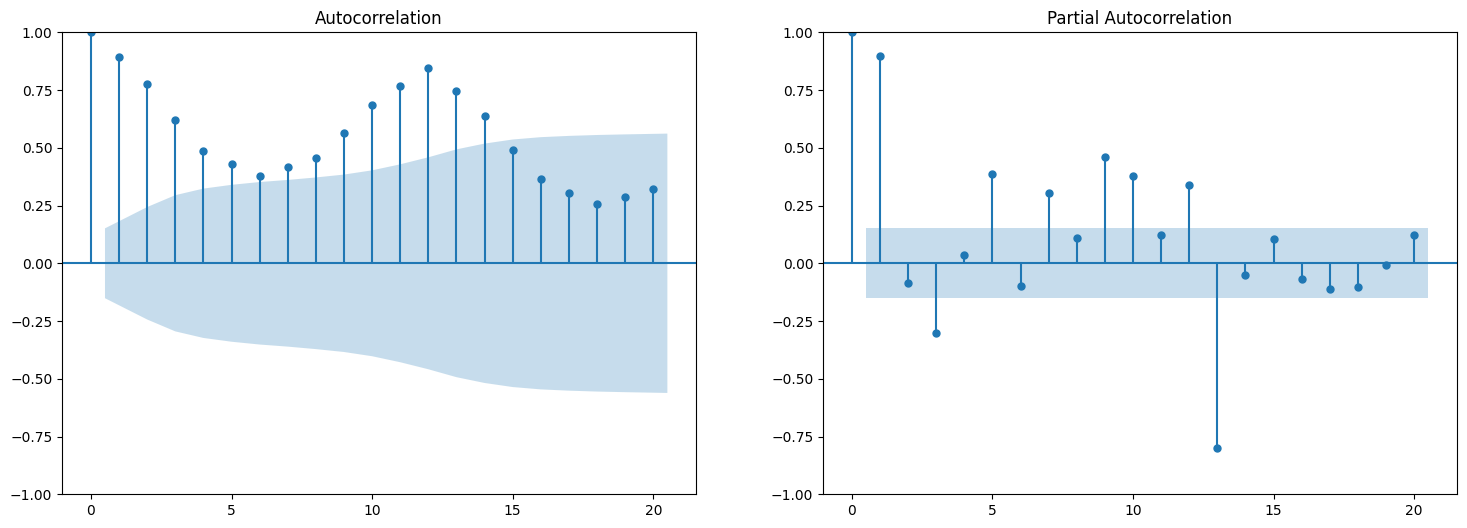

In [14]:
fig, ax = plt.subplots(1,2,figsize=(18,6))
plot_acf(dt, lags=20, ax=ax[0])
plot_pacf(dt, lags=20, ax=ax[1])
plt.show()

In [15]:
acf_coef = acf(dt)
print(acf_coef)

[1.         0.89157378 0.77817897 0.62027149 0.48666361 0.4281481
 0.37606367 0.41477252 0.45425153 0.56181499 0.68655906 0.76855255
 0.84491352 0.74498717 0.63766681 0.4896786  0.36355484 0.30594908
 0.25490794 0.28742069 0.32056924 0.41651576 0.52871253]


In [16]:
pacf_coef = pacf(dt)
print(pacf_coef)

[ 1.          0.89691254 -0.08641102 -0.30065408  0.03704353  0.38861552
 -0.09669472  0.30386494  0.10921593  0.46009995  0.37723165  0.1203746
  0.33930438 -0.79801803 -0.05104606  0.10633953 -0.06695209 -0.10974449
 -0.10405258 -0.00580825  0.12201984  0.11313973  0.1028468 ]


SMOOTIN AVERAGE

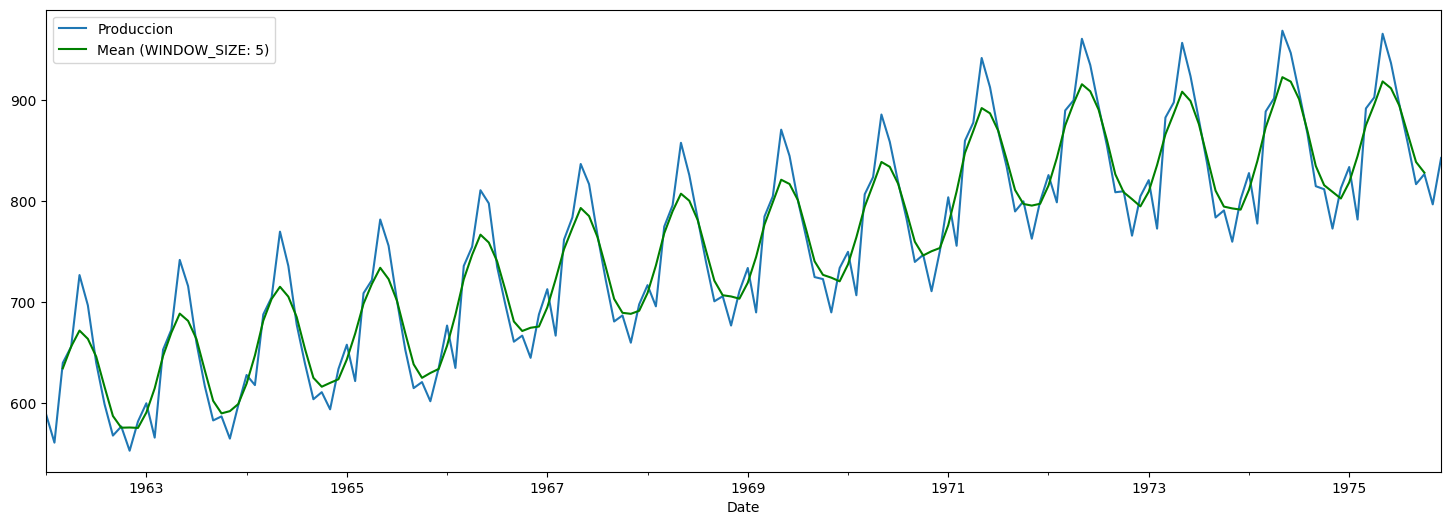

In [17]:
WINDOW_SIZE = 5

r = dt.rolling(window = WINDOW_SIZE, center=True)

figure(figsize=(18, 6))
dt['Production'].plot(label='Produccion')
r.mean()['Production'].plot(label='Mean (WINDOW_SIZE: '+str(WINDOW_SIZE) + ')', color='green');
plt.legend();

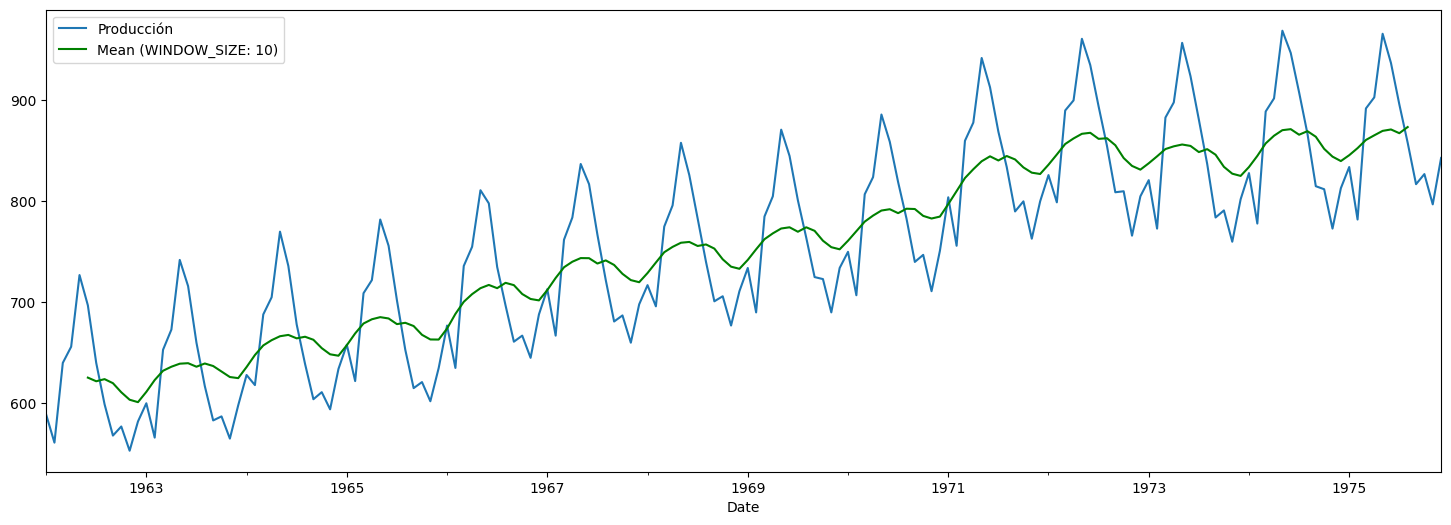

In [18]:
WINDOW_SIZE = 10

r = dt.rolling(window = WINDOW_SIZE, center=True)

figure(figsize=(18, 6))
dt['Production'].plot(label='Producción')
r.mean()['Production'].plot(label='Mean (WINDOW_SIZE: '+str(WINDOW_SIZE) + ')', color='green');
plt.legend();

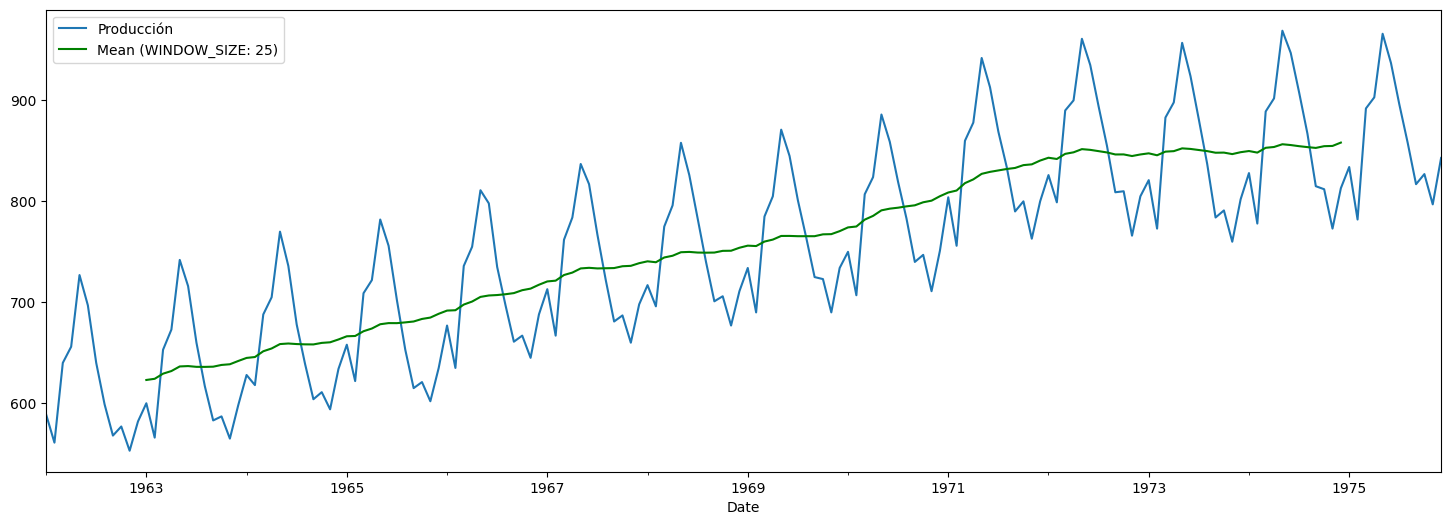

In [19]:
WINDOW_SIZE = 25

r = dt.rolling(window = WINDOW_SIZE, center=True)

figure(figsize=(18, 6))
dt['Production'].plot(label='Producción')
r.mean()['Production'].plot(label='Mean (WINDOW_SIZE: '+str(WINDOW_SIZE) + ')', color='green');
plt.legend();

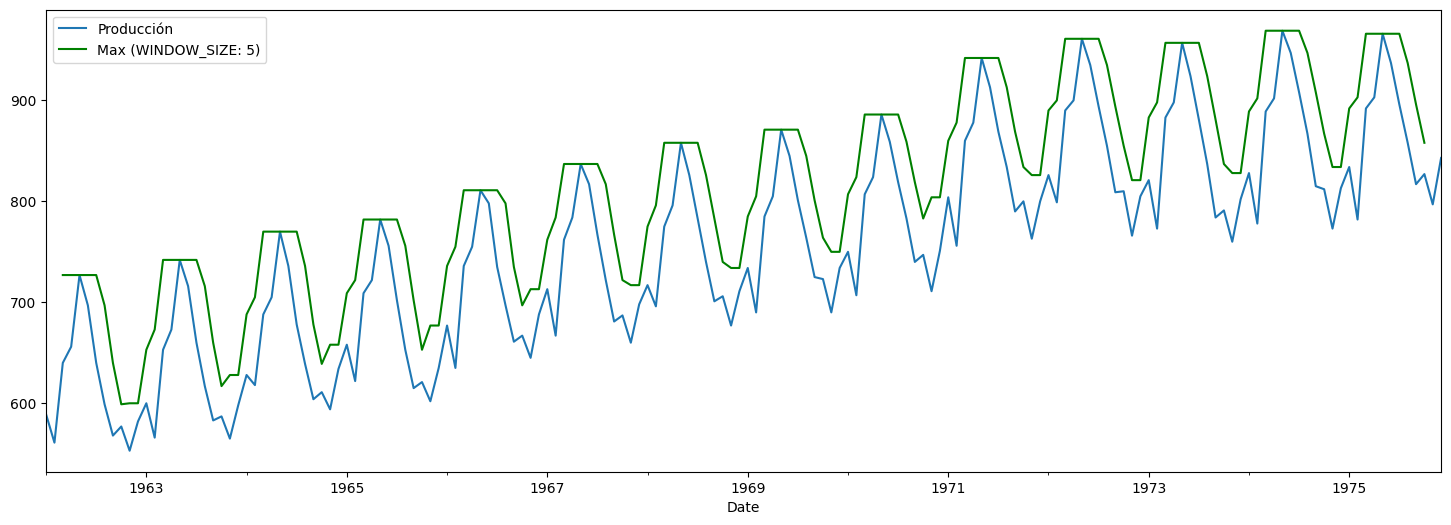

In [20]:
WINDOW_SIZE = 5

r = dt.rolling(window = WINDOW_SIZE, center=True)

figure(figsize=(18, 6))
dt['Production'].plot(label='Producción')
r.max()['Production'].plot(label='Max (WINDOW_SIZE: '+str(WINDOW_SIZE) + ')', color='green');
plt.legend();

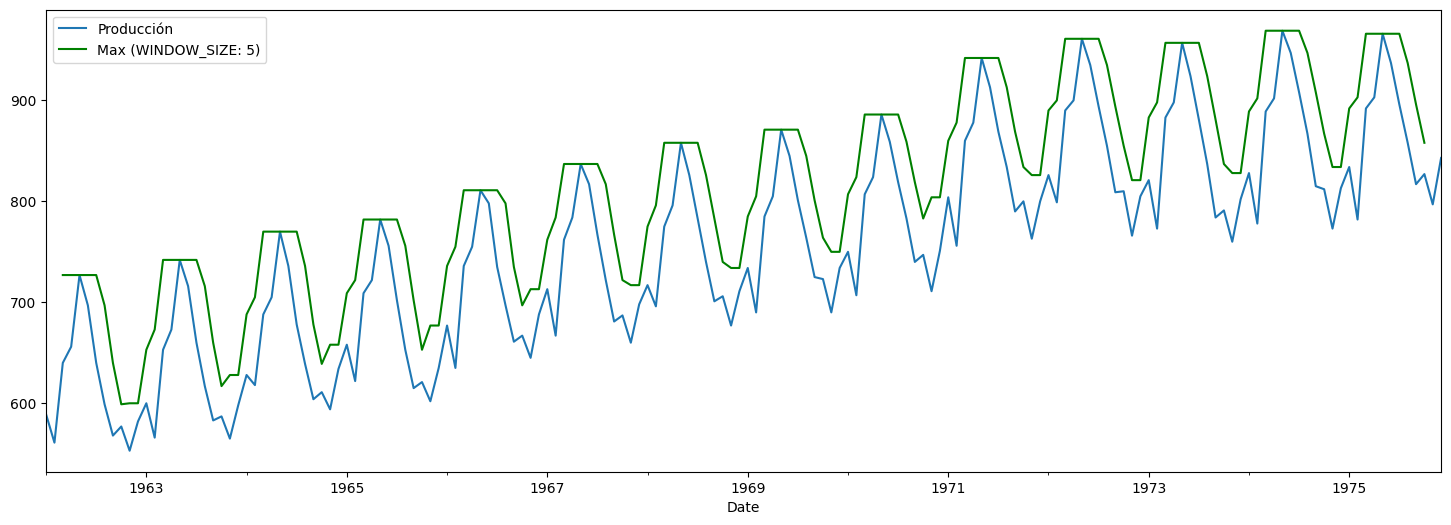

In [21]:
WINDOW_SIZE = 5

r = dt.rolling(window = WINDOW_SIZE, center=True)

figure(figsize=(18, 6))
dt['Production'].plot(label='Producción')
r.max()['Production'].plot(label='Max (WINDOW_SIZE: '+str(WINDOW_SIZE) + ')', color='green');
plt.legend();

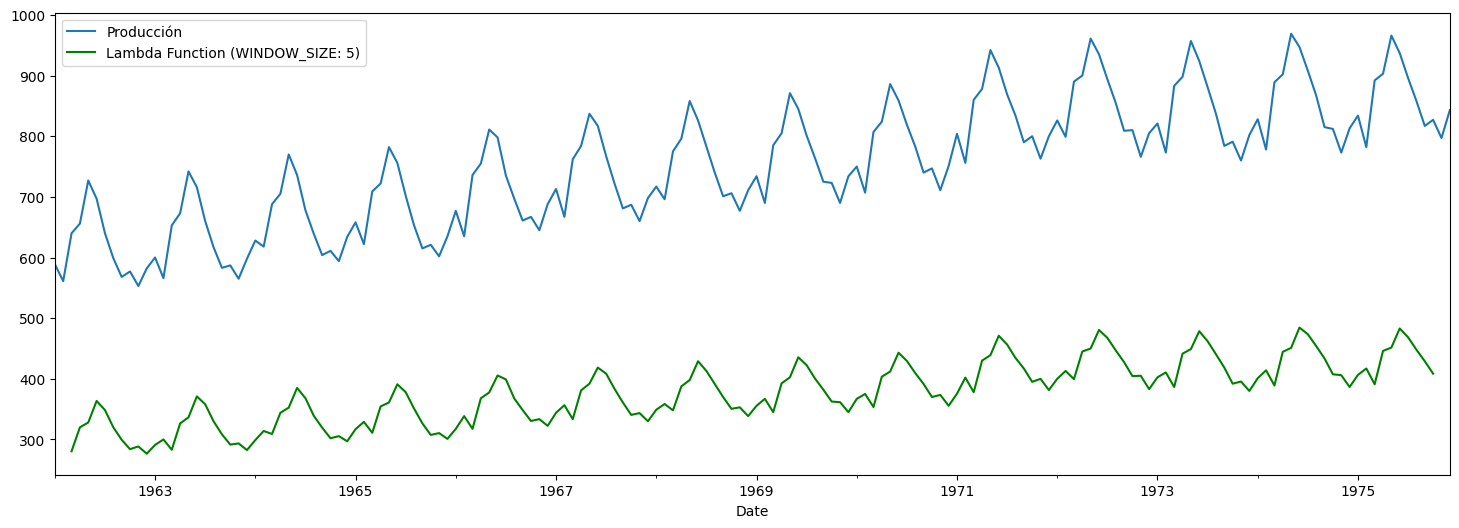

In [22]:
WINDOW_SIZE = 5

r = dt.rolling(window = WINDOW_SIZE, center=True)

figure(figsize=(18, 6))
dt['Production'].plot(label='Producción')
r['Production'].apply(lambda x: x[1]/2).plot(label='Lambda Function (WINDOW_SIZE: '+str(WINDOW_SIZE) + ')', color='green');
plt.legend();

MODELADO

In [23]:
import warnings
warnings.filterwarnings(action="ignore")

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sn

from sklearn.metrics import mean_squared_error
from math import sqrt

In [24]:
model_comparative = pd.DataFrame(columns=['RMSE'])

def AddModel(metric, value, model_comparative):

    met = pd.DataFrame(columns=['RMSE'], data=[np.round(value, 3)]).xs(0)
    met.name = metric
    model_comparative = model_comparative.append(met)

    model_comparative = model_comparative.sort_values(by=['RMSE'], ascending=True)
    
    return model_comparative

In [25]:
real= pd.read_csv('/content/MilkProduction.csv', parse_dates=['Date'], index_col='Date')

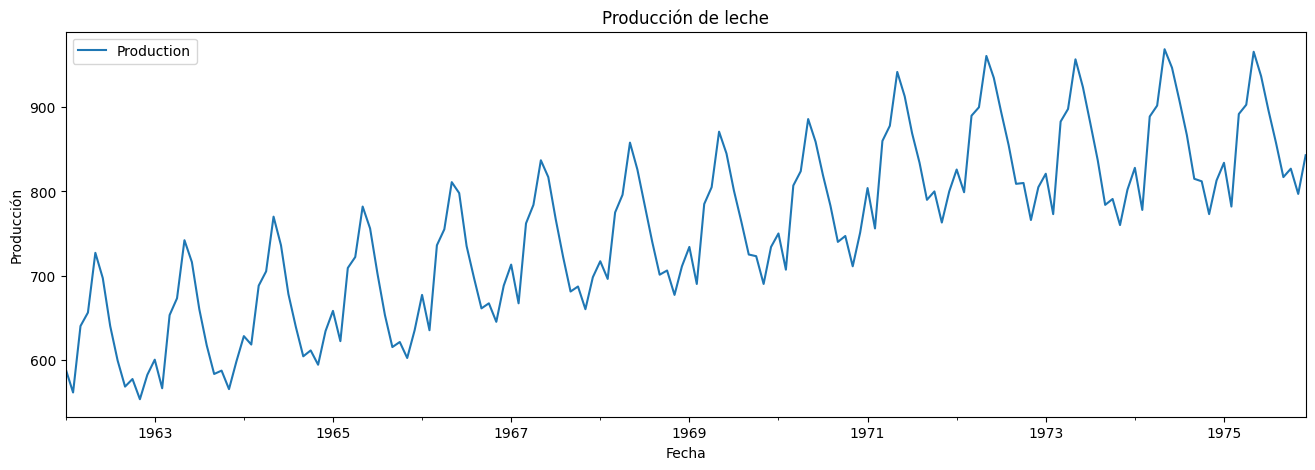

In [26]:
ax = real.plot(figsize=(16,5), title='Producción de leche');
ax.set_xlabel("Fecha");
ax.set_ylabel("Producción");

SEPARADO DEL DATASET

In [27]:
def splitSet(df, TEST_SIZE = 0.24):
    
    # Train set
    train_full = df[:(int(len(df)*(1-TEST_SIZE)))]
    train = train_full[:(int(len(train_full)*(1-TEST_SIZE)))]

    # Validation set
    valid = train_full[(int(len(train_full)*(1-TEST_SIZE))):]

    # Test set
    test = df[(int(len(df)*(1-TEST_SIZE))):]

    return train, valid, test

In [28]:
train, valid, test = splitSet(real)

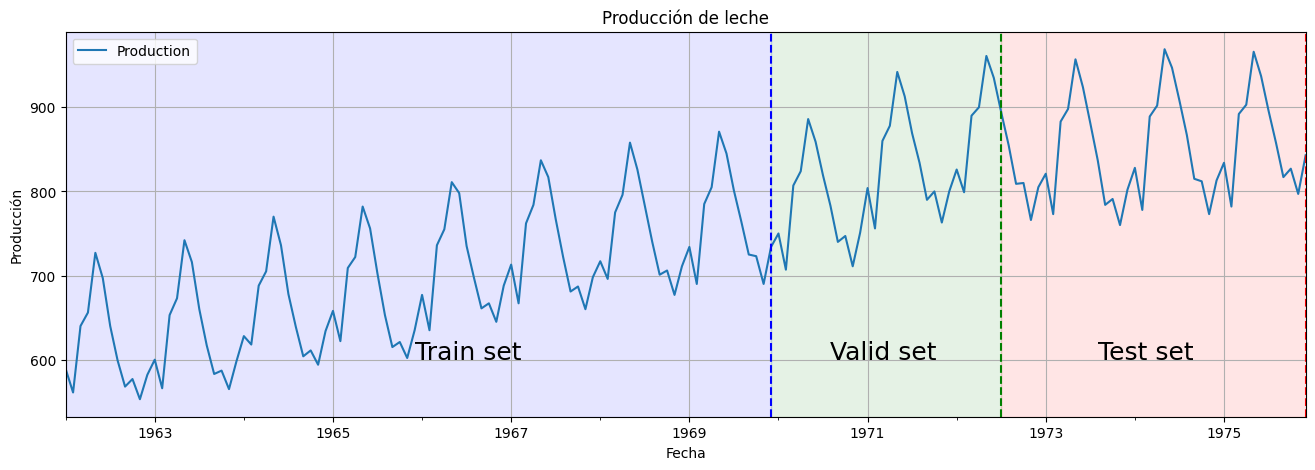

In [29]:
ax = real.plot(figsize=(16,5), title='Producción de leche');

init__limit = real.index[0]
train_limit = real.index[len(train)-1]
valid_limit = real.index[len(train)+len(valid)-1]
test__limit = real.index[len(train)+len(valid)+len(test)-1]

ax.axvline(train_limit, linestyle='--', color='blue')
ax.axvline(valid_limit, linestyle='--', color='green')
ax.axvline(test__limit, linestyle='--', color='red')

ax.axvspan(init__limit, train_limit, alpha=0.1, color='blue')
ax.axvspan(train_limit, valid_limit, alpha=0.1, color='green')
ax.axvspan(valid_limit, test__limit, alpha=0.1, color='red')

ax.text(real.index[int((len(train)-1)*0.5)], 600, 'Train set', fontsize=18)
ax.text(real.index[int(len(train)+(len(valid)-1)*0.25)], 600, 'Valid set', fontsize=18)
ax.text(real.index[int(len(train)+len(valid)+(len(test)-1)*0.3)], 600, 'Test set', fontsize=18)

ax.grid()

ax.set_xlabel("Fecha");
ax.set_ylabel("Producción");

In [30]:
train = pd.concat([train, valid], axis=0)

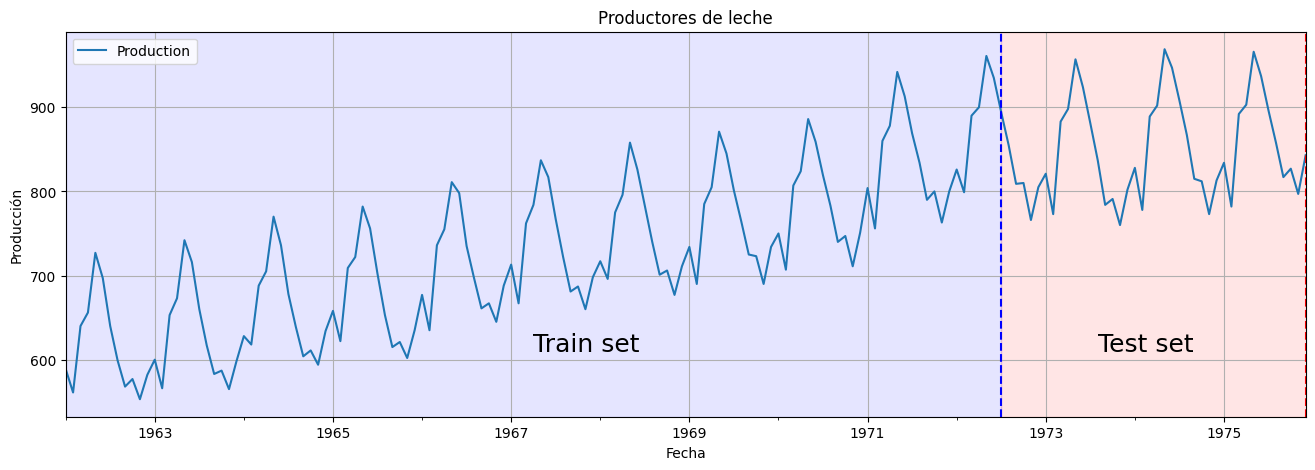

In [32]:
ax = real.plot(figsize=(16,5), title='Productores de leche');

init__limit = real.index[0]
train_limit = real.index[len(train)-1]
test__limit = real.index[len(train)+len(test)-1]

ax.axvline(train_limit, linestyle='--', color='blue')
ax.axvline(test__limit, linestyle='--', color='red')

ax.axvspan(init__limit, train_limit, alpha=0.1, color='blue')
ax.axvspan(train_limit, test__limit, alpha=0.1, color='red')

ax.text(real.index[int((len(train)-1)*0.5)], 610, 'Train set', fontsize=18)
ax.text(real.index[int(len(train)+(len(test)-1)*0.3)], 610, 'Test set', fontsize=18)

ax.grid()

ax.set_xlabel("Fecha");
ax.set_ylabel("Producción");

### 2.3. Desarrollar los siguientes modelos y obtener el RMSE de cada uno.

In [ ]:
#### 2.3.1. ARIMA - SARIMA

NAIVE PREDICTION

In [33]:
real.head()

Production
Date                  
1962-01-01         589
1962-02-01         561
1962-03-01         640
1962-04-01         656
1962-05-01         727

In [34]:
naive_pred = real.shift(periods=1)

In [35]:
naive_pred.head()

Production
Date                  
1962-01-01         NaN
1962-02-01       589.0
1962-03-01       561.0
1962-04-01       640.0
1962-05-01       656.0

RMSE
Naive Method  48.003

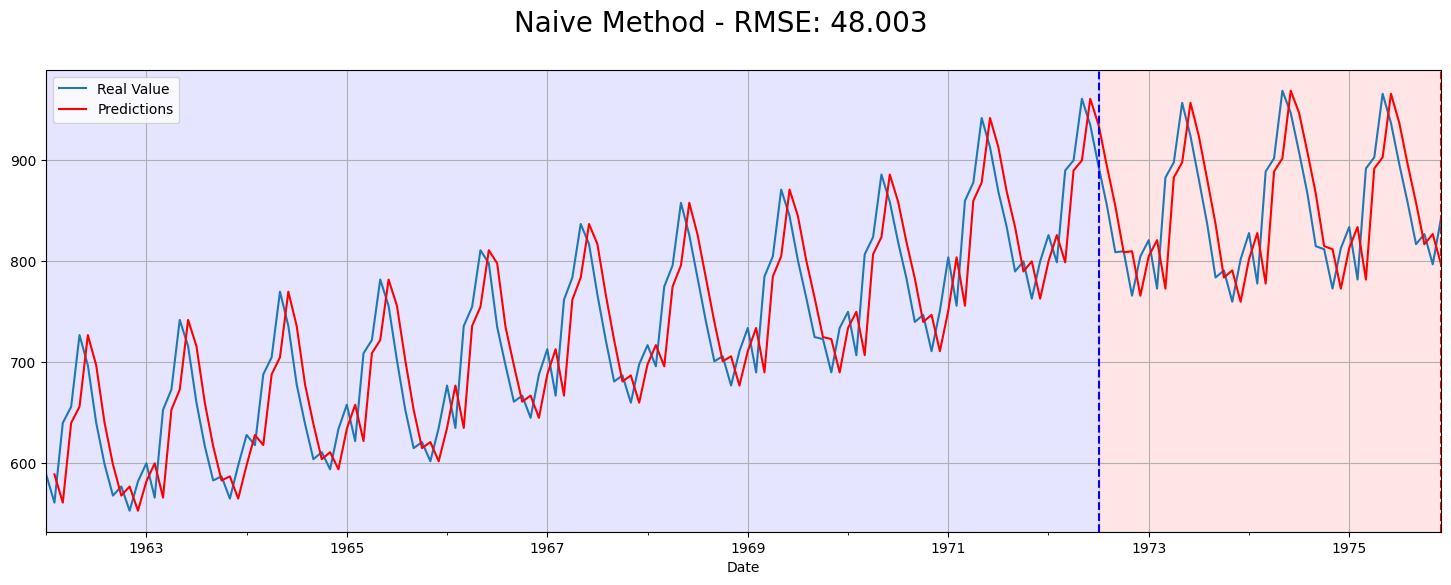

In [37]:
# Model
MODEL = 'Naive Method'

# Training model
fitted_train = train.shift(periods=1)

# Get Test Set Predictions
predict_test = test.shift(periods=1)

# Get RMSE from Test Set
real_values = test['Production'][1:]
pred_values = predict_test['Production'][1:]
rmse = sqrt(mean_squared_error(real_values, pred_values))

# Get predictions from whole set
predictions = real.shift(periods=1)

# Preparing data to plot
real_plot = real['Production']
pred_plot = predictions['Production']

# Visualization
figure(figsize=(18, 6))
real_plot.plot(label='Real Value')
pred_plot.plot(label='Predictions', color='red')
plt.suptitle(MODEL + ' - RMSE: ' + str(np.round(rmse, 3)), fontsize=20)
plt.legend();

plt.axvline(train_limit, linestyle='--', color='blue');
plt.axvline(test__limit, linestyle='--', color='red');

plt.axvspan(init__limit, train_limit, alpha=0.1, color='blue');
plt.axvspan(train_limit, test__limit, alpha=0.1, color='red');

plt.grid()

# Add to comparative table
model_comparative = AddModel(MODEL, rmse, model_comparative)
model_comparative.sort_values(by=['RMSE'], ascending=True)

TRAILING MOVING AVERAGE PREDICTION

In [38]:
real.head(10)

Production
Date                  
1962-01-01         589
1962-02-01         561
1962-03-01         640
1962-04-01         656
1962-05-01         727
1962-06-01         697
1962-07-01         640
1962-08-01         599
1962-09-01         568
1962-10-01         577

In [39]:
WINDOW_SIZE = 5

ma_pred = real.rolling(window = WINDOW_SIZE, center=False, closed='left').mean()
ma_pred.head(10)

Production
Date                  
1962-01-01         NaN
1962-02-01         NaN
1962-03-01         NaN
1962-04-01         NaN
1962-05-01         NaN
1962-06-01       634.6
1962-07-01       656.2
1962-08-01       672.0
1962-09-01       663.8
1962-10-01       646.2

In [40]:
# Model
MODEL = 'Trailing Moving Average'

# Training model
WINDOW_SIZE = 5
fitted_train = train.rolling(window = WINDOW_SIZE, center=False, closed='left').mean()

# Get Test Set Predictions
predict_test = test.rolling(window = WINDOW_SIZE, center=False, closed='left').mean()

# Get RMSE from Test Set
real_values = test['Production'][WINDOW_SIZE:]
pred_values = predict_test['Production'][WINDOW_SIZE:]
rmse = sqrt(mean_squared_error(real_values, pred_values))

# Get predictions from whole set
predictions = real.rolling(window = WINDOW_SIZE, center=False, closed='left').mean()

# Preparing data to plot
real_plot = real['Production']
pred_plot = predictions['Production']


RMSE
Naive Method             48.003
Trailing Moving Average  73.996

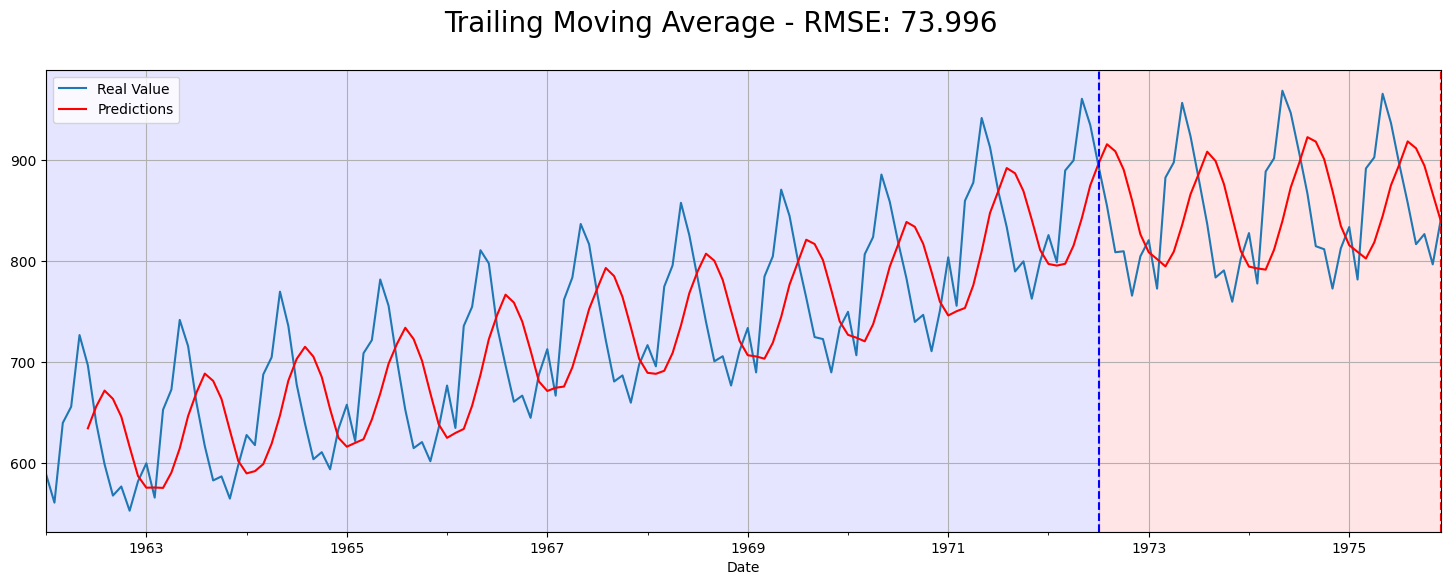

In [41]:
# Visualization
figure(figsize=(18, 6))

real_plot.plot(label='Real Value')
pred_plot.plot(label='Predictions', color='red')
plt.suptitle(MODEL + ' - RMSE: ' + str(np.round(rmse, 3)), fontsize=20)
plt.legend();

plt.axvline(train_limit, linestyle='--', color='blue');
plt.axvline(test__limit, linestyle='--', color='red');

plt.axvspan(init__limit, train_limit, alpha=0.1, color='blue');
plt.axvspan(train_limit, test__limit, alpha=0.1, color='red');

plt.grid()

# Add to comparative table
model_comparative = AddModel(MODEL, rmse, model_comparative)
model_comparative.sort_values(by=['RMSE'], ascending=True)

DETECCION DE ESTACIONARIDAD

In [42]:
from statsmodels.tsa.stattools import adfuller

In [43]:
adf_test = adfuller(real.dropna())
print("The p-value: ", adf_test[1])

The p-value:  0.6274267086030311


In [ ]:
PROVOCANDO ESTACIONARIDAD Y HACIENDO FORECANTING

In [44]:
real_log = np.log(real)
real_log.head(10)

Production
Date                  
1962-01-01    6.378426
1962-02-01    6.329721
1962-03-01    6.461468
1962-04-01    6.486161
1962-05-01    6.588926
1962-06-01    6.546785
1962-07-01    6.461468
1962-08-01    6.395262
1962-09-01    6.342121
1962-10-01    6.357842

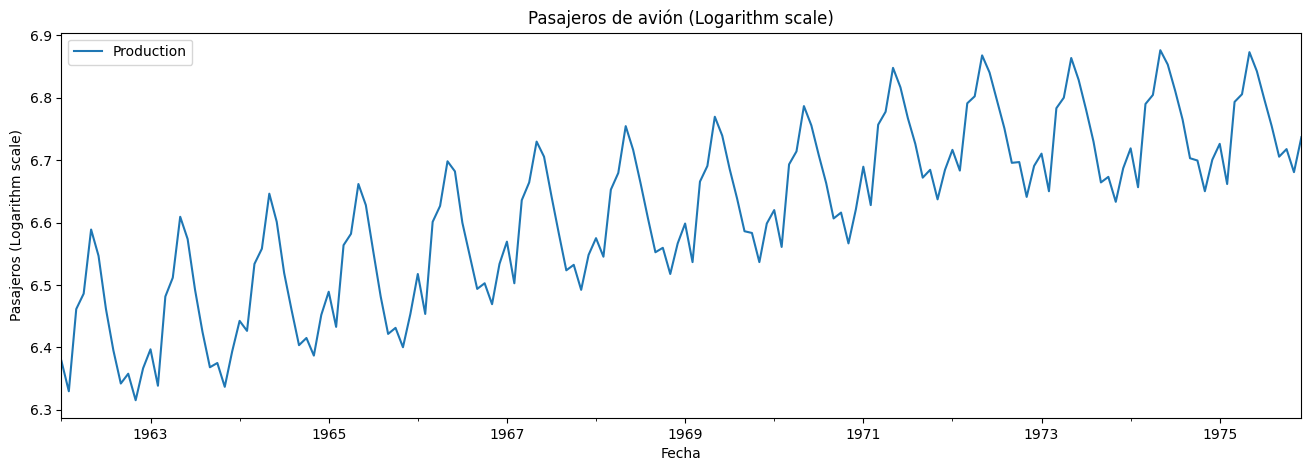

In [45]:
# Visualization
ax = real_log.plot(figsize=(16,5), title='Pasajeros de avión (Logarithm scale)');
ax.set_xlabel("Fecha");
ax.set_ylabel("Pasajeros (Logarithm scale)");

RMSE
Naive Method                               48.003
Trailing Moving Average                    73.996
Trailing Moving Average (logarithm scale)  74.071

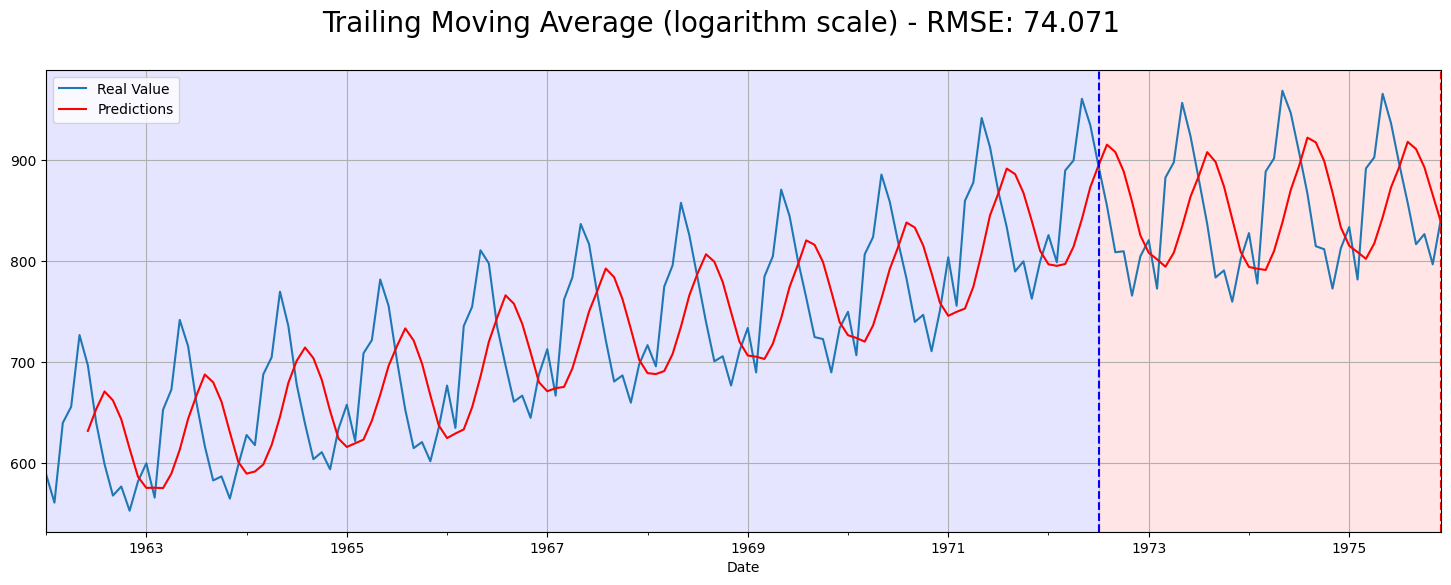

In [46]:
# Model
MODEL = 'Trailing Moving Average (logarithm scale)'

# Passing to log
real_log = np.log(real)
train_log = np.log(train)
test_log = np.log(test)

# Training model
WINDOW_SIZE = 5
fitted_train = train_log.rolling(window = WINDOW_SIZE, center=False, closed='left').mean()

# Get Test Set Predictions
predict_test = test_log.rolling(window = WINDOW_SIZE, center=False, closed='left').mean()

# Reverting from log
fitted_train = np.exp(fitted_train)
predict_test = np.exp(predict_test)

# Get RMSE from Test Set
real_values = test['Production'][WINDOW_SIZE:]
pred_values = predict_test['Production'][WINDOW_SIZE:]
rmse = sqrt(mean_squared_error(real_values, pred_values))

# Get predictions from whole set
predictions = real_log.rolling(window = WINDOW_SIZE, center=False, closed='left').mean()

# Reverting from log
predictions = np.exp(predictions)

# Preparing data to plot
real_plot = real['Production']
pred_plot = predictions['Production']

# Visualization
figure(figsize=(18, 6))

real_plot.plot(label='Real Value')
pred_plot.plot(label='Predictions', color='red')
plt.suptitle(MODEL + ' - RMSE: ' + str(np.round(rmse, 3)), fontsize=20)
plt.legend();

plt.axvline(train_limit, linestyle='--', color='blue');
plt.axvline(test__limit, linestyle='--', color='red');

plt.axvspan(init__limit, train_limit, alpha=0.1, color='blue');
plt.axvspan(train_limit, test__limit, alpha=0.1, color='red');

plt.grid()

# Add to comparative table
model_comparative = AddModel(MODEL, rmse, model_comparative)
model_comparative.sort_values(by=['RMSE'], ascending=True)

In [47]:
adf_test = adfuller(real_log.dropna())
print("The p-value: ", adf_test[1])

The p-value:  0.40312340233548627


#TRABAJANDO CON DIFFERENCING -ORDER 1

In [48]:
ORDER_DIFF = 1

real_diff_1 = real - real.shift(periods=ORDER_DIFF)
real_diff_1.head(10)

Production
Date                  
1962-01-01         NaN
1962-02-01       -28.0
1962-03-01        79.0
1962-04-01        16.0
1962-05-01        71.0
1962-06-01       -30.0
1962-07-01       -57.0
1962-08-01       -41.0
1962-09-01       -31.0
1962-10-01         9.0

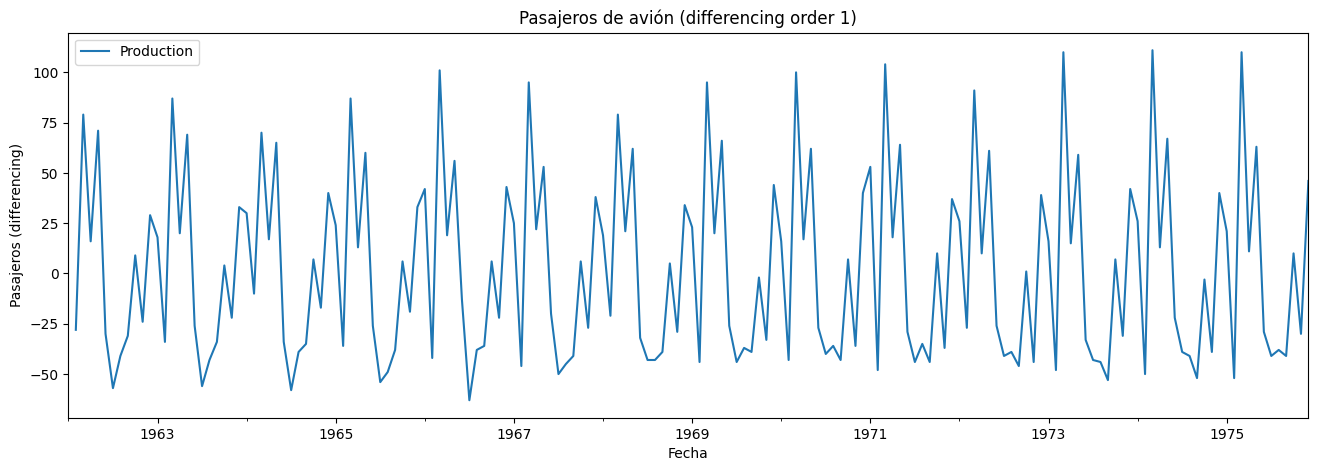

In [49]:
# Visualization
ax = real_diff_1.plot(figsize=(16,5), title='Pasajeros de avión (differencing order '+str(ORDER_DIFF)+')');
ax.set_xlabel("Fecha");
ax.set_ylabel("Pasajeros (differencing)");

RMSE
Naive Method                                    48.003
Trailing Moving Average (Differencing Order 1)  56.613
Trailing Moving Average                         73.996
Trailing Moving Average (logarithm scale)       74.071

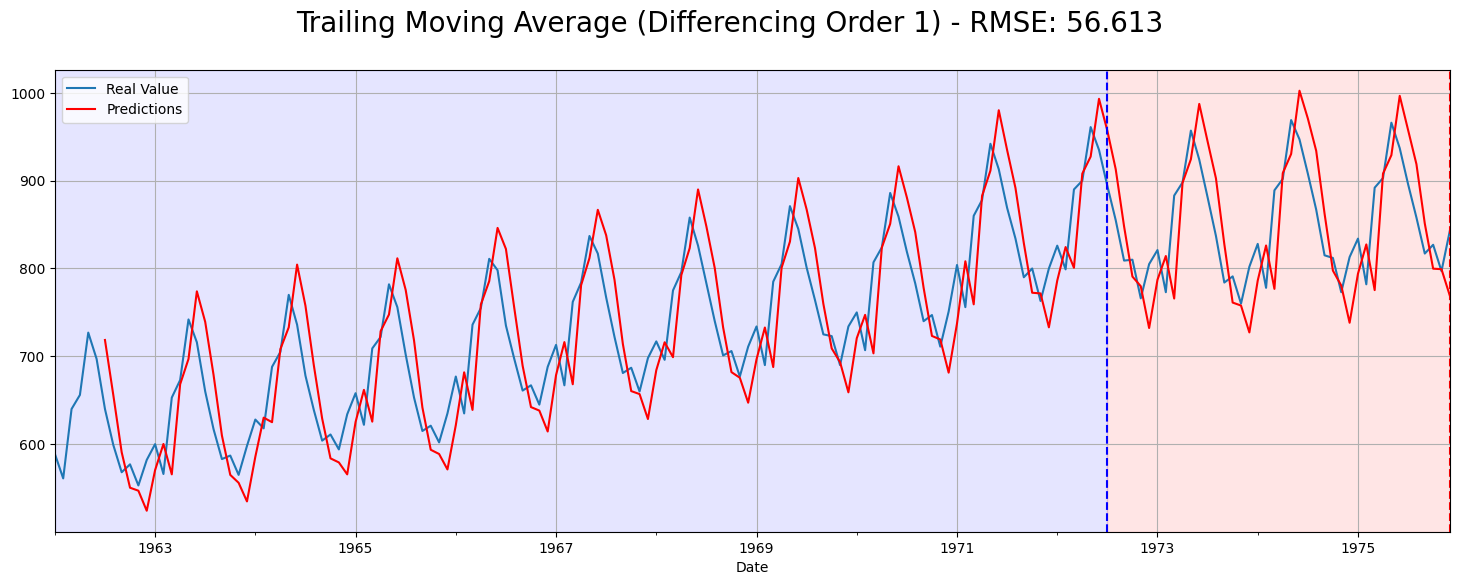

In [50]:
# Model
MODEL = 'Trailing Moving Average (Differencing Order 1)'

# Applying differencing
real_diff_1 = real - real.shift(periods=ORDER_DIFF)
train_diff_1 = train - train.shift(periods=ORDER_DIFF)
test_diff_1 = test - test.shift(periods=ORDER_DIFF)

# Training model
WINDOW_SIZE = 5
fitted_train = train_diff_1.rolling(window = WINDOW_SIZE, center=False, closed='left').mean()

# Get Test Set Predictions
predict_test = test_diff_1.rolling(window = WINDOW_SIZE, center=False, closed='left').mean()

# Reverting from differencing
fitted_train = fitted_train + train.shift(periods=ORDER_DIFF)
predict_test = predict_test + test.shift(periods=ORDER_DIFF)

# Get RMSE from Test Set
real_values = test['Production'][WINDOW_SIZE+ORDER_DIFF:]
pred_values = predict_test['Production'][WINDOW_SIZE+ORDER_DIFF:]
rmse = sqrt(mean_squared_error(real_values, pred_values))

# Get predictions from whole set
predictions = real_diff_1.rolling(window = WINDOW_SIZE, center=False, closed='left').mean()

# Reverting from differencing
predictions = predictions +  + real.shift(periods=ORDER_DIFF)

# Preparing data to plot
real_plot = real['Production']
pred_plot = predictions['Production']

# Visualization
figure(figsize=(18, 6))

real_plot.plot(label='Real Value')
pred_plot.plot(label='Predictions', color='red')
plt.suptitle(MODEL + ' - RMSE: ' + str(np.round(rmse, 3)), fontsize=20)
plt.legend();

plt.axvline(train_limit, linestyle='--', color='blue');
plt.axvline(test__limit, linestyle='--', color='red');

plt.axvspan(init__limit, train_limit, alpha=0.1, color='blue');
plt.axvspan(train_limit, test__limit, alpha=0.1, color='red');

plt.grid()

# Add to comparative table
model_comparative = AddModel(MODEL, rmse, model_comparative)
model_comparative.sort_values(by=['RMSE'], ascending=True)

In [51]:
adf_test = adfuller(real_diff_1.dropna())
print("The p-value: ", adf_test[1])

The p-value:  0.03006800400178324


TRABAJANDO CON DIFFERENCING -ORDER 12

In [52]:
ORDER_DIFF = 12

real_diff_12 = real - real.shift(periods=ORDER_DIFF)
real_diff_12.head(20)

Production
Date                  
1962-01-01         NaN
1962-02-01         NaN
1962-03-01         NaN
1962-04-01         NaN
1962-05-01         NaN
1962-06-01         NaN
1962-07-01         NaN
1962-08-01         NaN
1962-09-01         NaN
1962-10-01         NaN
1962-11-01         NaN
1962-12-01         NaN
1963-01-01        11.0
1963-02-01         5.0
1963-03-01        13.0
1963-04-01        17.0
1963-05-01        15.0
1963-06-01        19.0
1963-07-01        20.0
1963-08-01        18.0

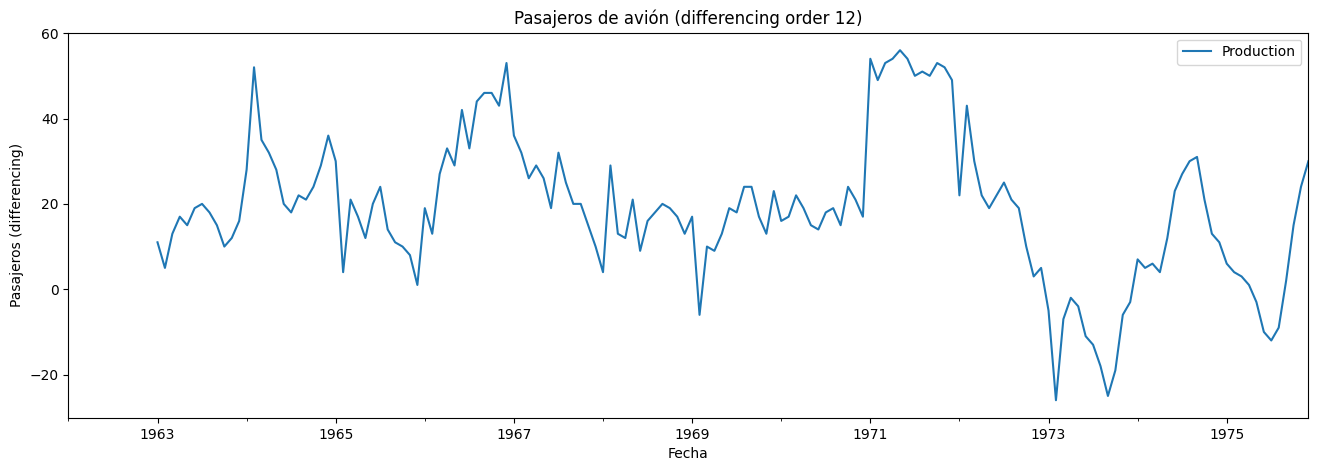

In [53]:
# Visualization
ax = real_diff_12.plot(figsize=(16,5), title='Pasajeros de avión (differencing order '+str(ORDER_DIFF)+')');
ax.set_xlabel("Fecha");
ax.set_ylabel("Pasajeros (differencing)");

RMSE
Trailing Moving Average (Differencing Order 12)  14.269
Naive Method                                     48.003
Trailing Moving Average (Differencing Order 1)   56.613
Trailing Moving Average                          73.996
Trailing Moving Average (logarithm scale)        74.071

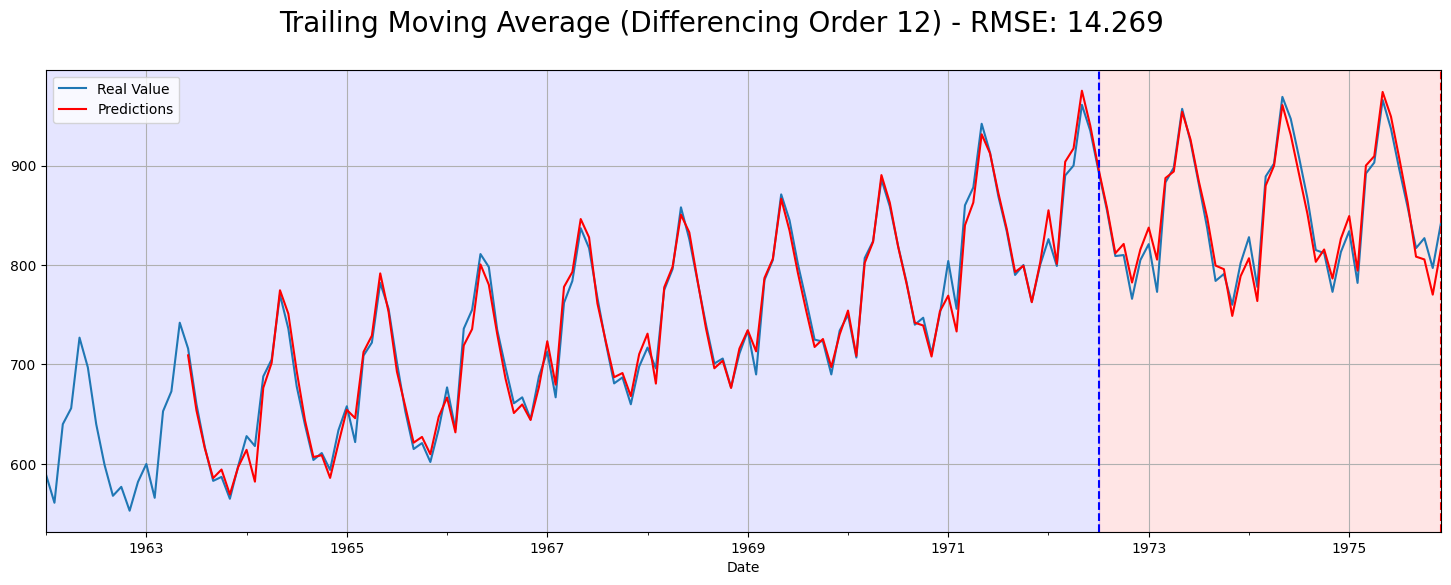

In [55]:
# Model
MODEL = 'Trailing Moving Average (Differencing Order 12)'

# Applying differencing
real_diff_12 = real - real.shift(periods=ORDER_DIFF)
train_diff_12 = train - train.shift(periods=ORDER_DIFF)
test_diff_12 = test - test.shift(periods=ORDER_DIFF)

# Training model
WINDOW_SIZE = 5
fitted_train = train_diff_12.rolling(window = WINDOW_SIZE, center=False, closed='left').mean()

# Get Test Set Predictions
predict_test = test_diff_12.rolling(window = WINDOW_SIZE, center=False, closed='left').mean()

# Reverting from differencing
fitted_train = fitted_train + train.shift(periods=ORDER_DIFF)
predict_test = predict_test + test.shift(periods=ORDER_DIFF)

# Get RMSE from Test Set
real_values = test['Production'][WINDOW_SIZE+ORDER_DIFF:]
pred_values = predict_test['Production'][WINDOW_SIZE+ORDER_DIFF:]
rmse = sqrt(mean_squared_error(real_values, pred_values))

# Get predictions from whole set
predictions = real_diff_12.rolling(window = WINDOW_SIZE, center=False, closed='left').mean()

# Reverting from differencing
predictions = predictions +  + real.shift(periods=ORDER_DIFF)

# Preparing data to plot
real_plot = real['Production']
pred_plot = predictions['Production']

# Visualization
figure(figsize=(18, 6))

real_plot.plot(label='Real Value')
pred_plot.plot(label='Predictions', color='red')
plt.suptitle(MODEL + ' - RMSE: ' + str(np.round(rmse, 3)), fontsize=20)
plt.legend();

plt.axvline(train_limit, linestyle='--', color='blue');
plt.axvline(test__limit, linestyle='--', color='red');

plt.axvspan(init__limit, train_limit, alpha=0.1, color='blue');
plt.axvspan(train_limit, test__limit, alpha=0.1, color='red');

plt.grid()

# Add to comparative table
model_comparative = AddModel(MODEL, rmse, model_comparative)
model_comparative.sort_values(by=['RMSE'], ascending=True)

In [56]:
adf_test = adfuller(real_diff_12.dropna())
print("The p-value: ", adf_test[1])

The p-value:  0.1607988052771125


#PREDICCION CON ARMA

In [66]:
from statsmodels.tsa.arima_model import ARIMA

In [67]:
pip install --upgrade statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
from statsmodels.tsa.arima.model import ARIMA

RMSE         Model
0   14.269000           NaN
1   48.003000           NaN
2   56.613000           NaN
3   73.996000           NaN
4   74.071000           NaN
5  119.008597  ARMA Process

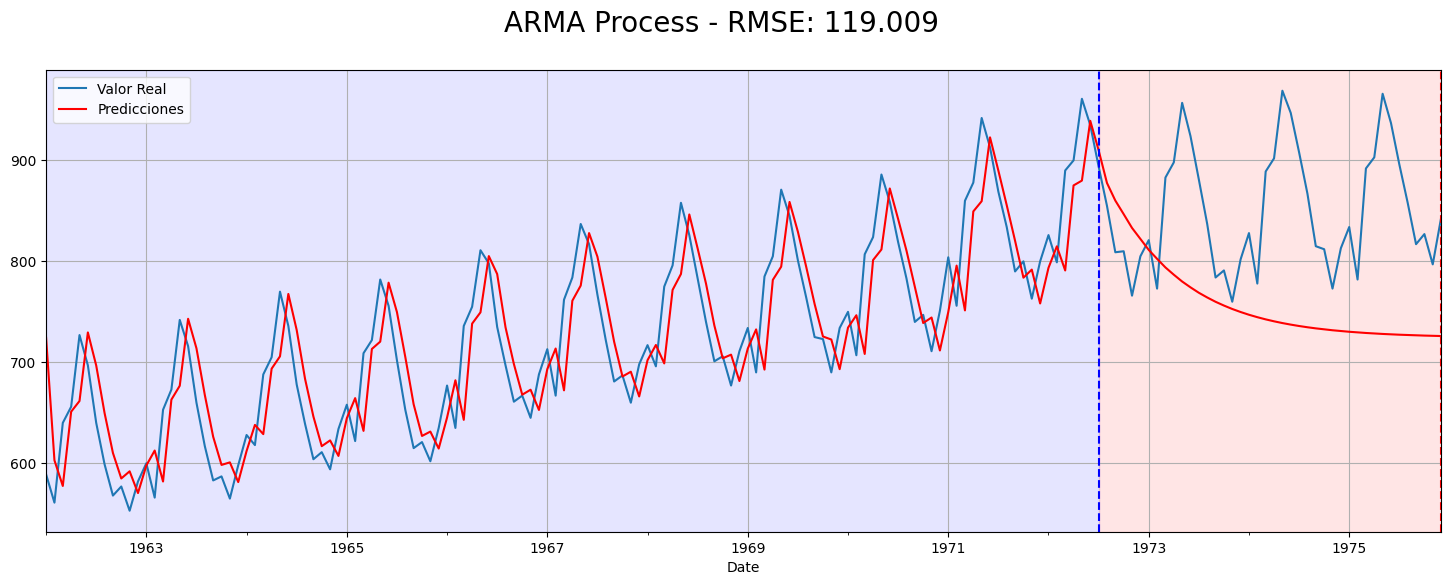

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Definir función para agregar modelo a la tabla comparativa
def AddModel(model_name, rmse, model_comparative):
    model_comparative = model_comparative.append({'Model': model_name, 'RMSE': rmse}, ignore_index=True)
    return model_comparative

# Definir parámetros del modelo
p = 2
q = 1

# Entrenar el modelo
model = ARIMA(train, order=(p, 0, q))
fitted_model = model.fit()
fitted_train = fitted_model.fittedvalues

# Obtener predicciones para el conjunto de pruebas
predict_test = fitted_model.predict(start=test.index[0], end=test.index[len(test)-1])

# Calcular el RMSE para el conjunto de pruebas
real_values = test['Production']
pred_values = predict_test
rmse = sqrt(mean_squared_error(real_values, pred_values))

# Obtener predicciones para todo el conjunto de datos
predictions = fitted_model.predict(start=real.index[0], end=real.index[len(real)-1])

# Preparar los datos para graficar
real_plot = real['Production']
pred_plot = predictions

# Visualización
plt.figure(figsize=(18, 6))
real_plot.plot(label='Valor Real')
pred_plot.plot(label='Predicciones', color='red')
plt.suptitle(MODEL + ' - RMSE: ' + str(np.round(rmse, 3)), fontsize=20)
plt.legend()

plt.axvline(train_limit, linestyle='--', color='blue')
plt.axvline(test__limit, linestyle='--', color='red')

plt.axvspan(init__limit, train_limit, alpha=0.1, color='blue')
plt.axvspan(train_limit, test__limit, alpha=0.1, color='red')

plt.grid()

# Agregar al cuadro comparativo
model_comparative = AddModel(MODEL, rmse, model_comparative)
model_comparative.sort_values(by=['RMSE'], ascending=True)


TRABAJANDO CON DIFFERENCING EN ARMA ORDER-12

RMSE                                 Model
0   14.269000                                   NaN
6   23.304230  ARMA Process (Differencing Order 12)
1   48.003000                                   NaN
2   56.613000                                   NaN
3   73.996000                                   NaN
4   74.071000                                   NaN
5  119.008597                          ARMA Process

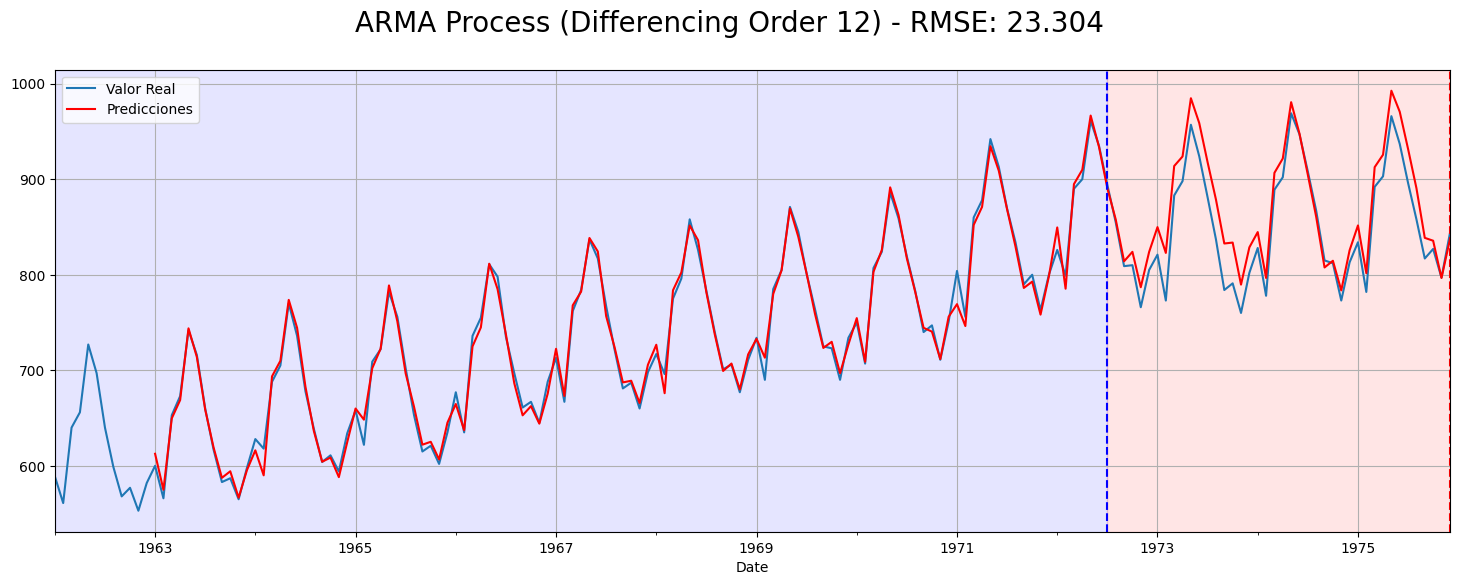

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Definir función para agregar modelo a la tabla comparativa
def AddModel(model_name, rmse, model_comparative):
    model_comparative = model_comparative.append({'Model': model_name, 'RMSE': rmse}, ignore_index=True)
    return model_comparative

# Definir orden de diferenciación
ORDER_DIFF = 12

# Model
MODEL = 'ARMA Process (Differencing Order 12)'

# Aplicar diferenciación
real_diff_12 = real - real.shift(periods=ORDER_DIFF)
train_diff_12, valid_diff_12, test_diff_12 = splitSet(real_diff_12)
train_diff_12 = pd.concat([train_diff_12, valid_diff_12], axis=0)[ORDER_DIFF:]

real_diff_12 = real_diff_12[ORDER_DIFF:]

# Coefficients
p = 2
q = 1

# Entrenar el modelo
model = ARIMA(train_diff_12, order=(p, 0, q))
fitted_model = model.fit()
fitted_train = fitted_model.fittedvalues

# Obtener predicciones para el conjunto de pruebas
predict_test = fitted_model.predict(start=test_diff_12.index[0], end=test_diff_12.index[len(test_diff_12)-1])

# Revertir la diferenciación
fitted_train = fitted_train + train.shift(periods=ORDER_DIFF)['Production']
predict_test = predict_test + test.shift(periods=ORDER_DIFF)['Production']

# Calcular el RMSE para el conjunto de pruebas
real_values = test['Production'][ORDER_DIFF:]
pred_values = predict_test[ORDER_DIFF:]
rmse = sqrt(mean_squared_error(real_values, pred_values))

# Obtener predicciones para todo el conjunto de datos
predictions = fitted_model.predict(start=real_diff_12.index[0], end=real_diff_12.index[len(real_diff_12)-1])

# Revertir la diferenciación
predictions = predictions + real.shift(periods=ORDER_DIFF)['Production']

# Preparar los datos para graficar
real_plot = real['Production']
pred_plot = predictions

# Visualización
plt.figure(figsize=(18, 6))
real_plot.plot(label='Valor Real')
pred_plot.plot(label='Predicciones', color='red')
plt.suptitle(MODEL + ' - RMSE: ' + str(np.round(rmse, 3)), fontsize=20)
plt.legend()

plt.axvline(train_limit, linestyle='--', color='blue')
plt.axvline(test__limit, linestyle='--', color='red')

plt.axvspan(init__limit, train_limit, alpha=0.1, color='blue')
plt.axvspan(train_limit, test__limit, alpha=0.1, color='red')

plt.grid()

# Agregar al cuadro comparativo
model_comparative = AddModel(MODEL, rmse, model_comparative)
model_comparative.sort_values(by=['RMSE'], ascending=True)


#PREDICCION CON ARIMA

RMSE                                 Model
0   14.269000                                   NaN
6   23.304230  ARMA Process (Differencing Order 12)
1   48.003000                                   NaN
2   56.613000                                   NaN
3   73.996000                                   NaN
4   74.071000                                   NaN
5  119.008597                          ARMA Process
7  870.313658                         ARIMA Process

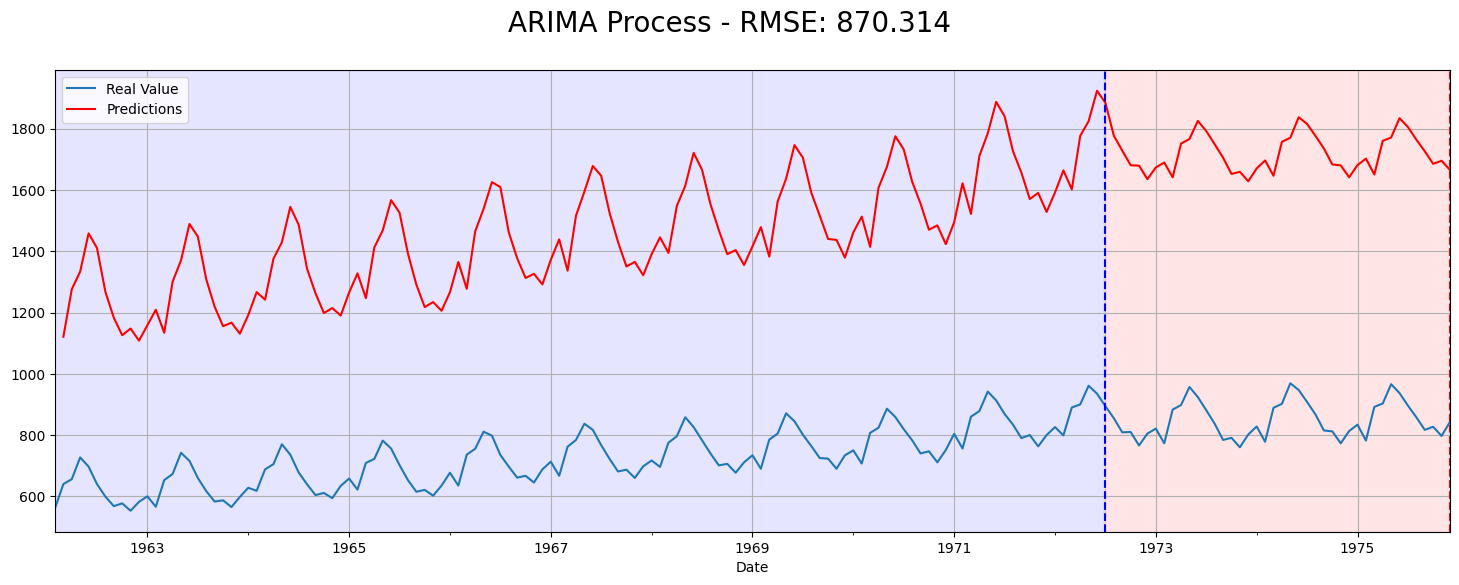

In [74]:
#Model
MODEL = 'ARIMA Process'

# Coefficients
p = 2
d = 1
q = 1

# Training model
model = ARIMA(train, order=(p, d, q))
fitted_model = model.fit()
fitted_train = fitted_model.fittedvalues

# Get Test Set Predictions
predict_test = fitted_model.predict(start=test.index[0], end=test.index[len(test)-1])

# Reverting from differencing
fitted_train = fitted_train + train.shift(periods=d)['Production']
predict_test = predict_test + test.shift(periods=d)['Production']

# Get RMSE from Test Set
real_values = test['Production'][d:]
pred_values = predict_test[d:]
rmse = sqrt(mean_squared_error(real_values, pred_values))

# Get predictions from whole set
predictions = fitted_model.predict(start=real[d:].index[0], end=real[d:].index[len(real[d:])-1])

# Reverting from differencing
predictions = predictions + real[d:].shift(periods=d)['Production']

# Preparing data to plot
real_plot = real['Production'][d:]
pred_plot = predictions

# Visualization
plt.figure(figsize=(18, 6))

real_plot.plot(label='Real Value')
pred_plot.plot(label='Predictions', color='red')
plt.suptitle(MODEL + ' - RMSE: ' + str(np.round(rmse, 3)), fontsize=20)
plt.legend()

plt.axvline(train_limit, linestyle='--', color='blue')
plt.axvline(test__limit, linestyle='--', color='red')

plt.axvspan(init__limit, train_limit, alpha=0.1, color='blue')
plt.axvspan(train_limit, test__limit, alpha=0.1, color='red')

plt.grid()

# Add to comparative table
model_comparative = AddModel(MODEL, rmse, model_comparative)
model_comparative.sort_values(by=['RMSE'], ascending=True)

#PREDICCION CON SARIMA

In [75]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

RMSE                                 Model
0   14.269000                                   NaN
6   23.304230  ARMA Process (Differencing Order 12)
1   48.003000                                   NaN
2   56.613000                                   NaN
8   62.246921                        SARIMA Process
3   73.996000                                   NaN
4   74.071000                                   NaN
5  119.008597                          ARMA Process
7  870.313658                         ARIMA Process

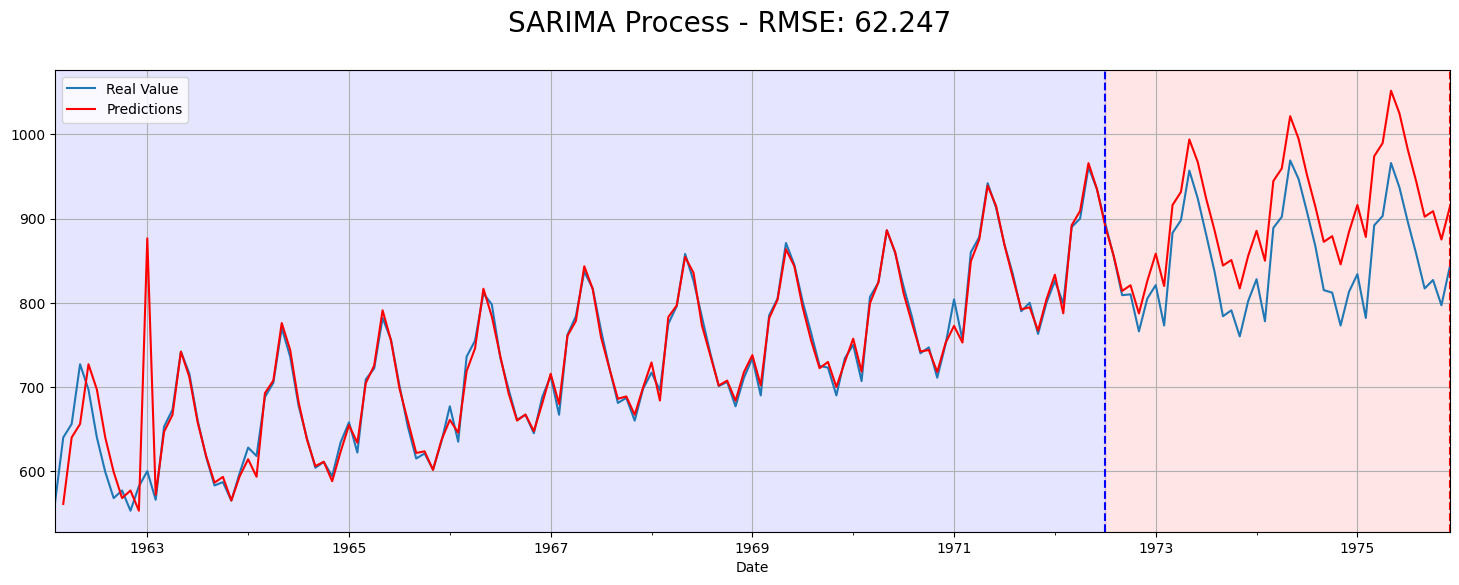

In [76]:
# Model
MODEL = 'SARIMA Process'

# Coefficients
p=0
d=1
q=1
P=1
D=1
Q=2
m=12

trend_order = (p,d,q)
seasonal_order = (P,D,Q,m)

# Training model
model = SARIMAX(train, order = trend_order, seasonal_order = seasonal_order)
fitted_model = model.fit(disp=-1)
fitted_train = fitted_model.fittedvalues

# Get Test Set Predictions
predict_test = fitted_model.predict(test.index[0], test.index[len(test)-1])

# Get RMSE from Test Set
real_values = test['Production'][trend_order[1]:]
pred_values = predict_test[trend_order[1]:]
rmse = sqrt(mean_squared_error(real_values, pred_values))

# Get predictions from whole set
predictions = fitted_model.predict(real[trend_order[1]:].index[0], real[trend_order[1]:].index[len(real[trend_order[1]:])-1])[trend_order[1]:]

# Preparing data to plot
real_plot = real['Production'][trend_order[1]:]
pred_plot = predictions

# Visualization
figure(figsize=(18, 6))

real_plot.plot(label='Real Value')
pred_plot.plot(label='Predictions', color='red')
plt.suptitle(MODEL + ' - RMSE: ' + str(np.round(rmse, 3)), fontsize=20)
plt.legend();

plt.axvline(train_limit, linestyle='--', color='blue');
plt.axvline(test__limit, linestyle='--', color='red');

plt.axvspan(init__limit, train_limit, alpha=0.1, color='blue');
plt.axvspan(train_limit, test__limit, alpha=0.1, color='red');

plt.grid()

# Add to comparative table
model_comparative = AddModel(MODEL, rmse, model_comparative)
model_comparative.sort_values(by=['RMSE'], ascending=True)

#PREDICCIÓN CON AUTOARIMA

In [77]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.0 MB/s eta 0:00:00


In [78]:
import pmdarima as pm

ARIMA COEFFICIENTS:

AR (p): 2
I (d): 0
MA (q): 0
Seasonal AR (P): 0
Seasonal I (D): 1
Seasonal MA (Q): 1
Seasonal Order: 12


RMSE                                 Model
0   14.269000                                   NaN
6   23.304230  ARMA Process (Differencing Order 12)
1   48.003000                                   NaN
9   51.847124                     AutoArima Process
2   56.613000                                   NaN
8   62.246921                        SARIMA Process
3   73.996000                                   NaN
4   74.071000                                   NaN
5  119.008597                          ARMA Process
7  870.313658                         ARIMA Process

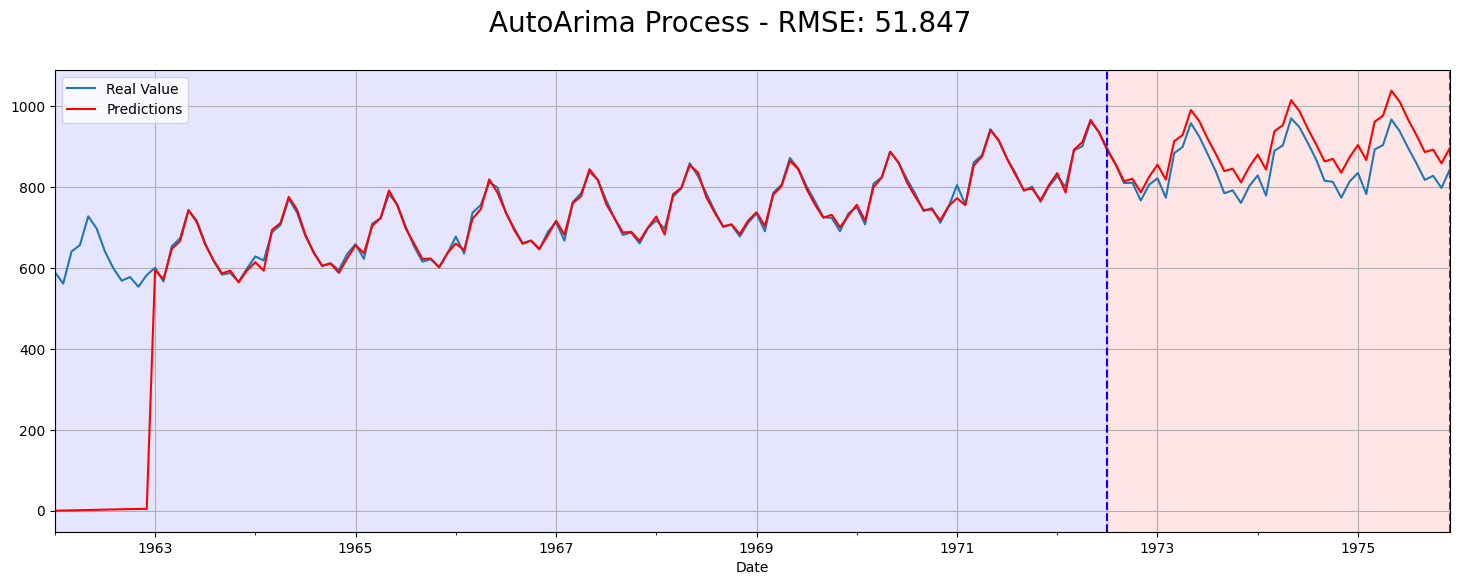

In [79]:
# Model
MODEL = 'AutoArima Process'

# Coefficients
auto_arima = pm.auto_arima(real, seasonal=True, m=12)
trend_order = auto_arima.order
seasonal_order = auto_arima.seasonal_order

print('ARIMA COEFFICIENTS:\n')
print('AR (p): ' + str(auto_arima.order[0]))
print('I (d): ' + str(auto_arima.order[1]))
print('MA (q): ' + str(auto_arima.order[2]))
print('Seasonal AR (P): ' + str(auto_arima.seasonal_order[0]))
print('Seasonal I (D): ' + str(auto_arima.seasonal_order[1]))
print('Seasonal MA (Q): ' + str(auto_arima.seasonal_order[2]))
print('Seasonal Order: ' + str(auto_arima.seasonal_order[3]))

# Training model
model = SARIMAX(train, order = trend_order, seasonal_order = seasonal_order)
fitted_model = model.fit(disp=-1)
fitted_train = fitted_model.fittedvalues

# Get Test Set Predictions
predict_test = fitted_model.predict(test.index[0], test.index[len(test)-1])

# Get RMSE from Test Set
real_values = test['Production'][trend_order[1]:]
pred_values = predict_test[trend_order[1]:]
rmse = sqrt(mean_squared_error(real_values, pred_values))

# Get predictions from whole set
predictions = fitted_model.predict(real[trend_order[1]:].index[0], real[trend_order[1]:].index[len(real[trend_order[1]:])-1])[trend_order[1]:]

# Preparing data to plot
real_plot = real['Production'][trend_order[1]:]
pred_plot = predictions

# Visualization
figure(figsize=(18, 6))

real_plot.plot(label='Real Value')
pred_plot.plot(label='Predictions', color='red')
plt.suptitle(MODEL + ' - RMSE: ' + str(np.round(rmse, 3)), fontsize=20)
plt.legend();

plt.axvline(train_limit, linestyle='--', color='blue');
plt.axvline(test__limit, linestyle='--', color='red');

plt.axvspan(init__limit, train_limit, alpha=0.1, color='blue');
plt.axvspan(train_limit, test__limit, alpha=0.1, color='red');

plt.grid()

# Add to comparative table
model_comparative = AddModel(MODEL, rmse, model_comparative)
model_comparative.sort_values(by=['RMSE'], ascending=True)

DEEP LEARNING CON TENSOFLOR

In [80]:
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras

In [81]:
real_tf = real.copy()

In [82]:
real_tf.head(10)

Production
Date                  
1962-01-01         589
1962-02-01         561
1962-03-01         640
1962-04-01         656
1962-05-01         727
1962-06-01         697
1962-07-01         640
1962-08-01         599
1962-09-01         568
1962-10-01         577

In [84]:
real_tf_temp = tf.data.Dataset.from_tensor_slices(real_tf['Production'].values)

real_tf_temp = real_tf_temp.window(5, shift=1, drop_remainder=True)
real_tf_temp = real_tf_temp.flat_map(lambda window: window.batch(5))
real_tf_temp = real_tf_temp.map(lambda window: (window[:-1], window[-1:]))

for x,y in real_tf_temp:
    print(x.numpy(), y.numpy())

[589 561 640 656] [727]
[561 640 656 727] [697]
[640 656 727 697] [640]
[656 727 697 640] [599]
[727 697 640 599] [568]
[697 640 599 568] [577]
[640 599 568 577] [553]
[599 568 577 553] [582]
[568 577 553 582] [600]
[577 553 582 600] [566]
[553 582 600 566] [653]
[582 600 566 653] [673]
[600 566 653 673] [742]
[566 653 673 742] [716]
[653 673 742 716] [660]
[673 742 716 660] [617]
[742 716 660 617] [583]
[716 660 617 583] [587]
[660 617 583 587] [565]
[617 583 587 565] [598]
[583 587 565 598] [628]
[587 565 598 628] [618]
[565 598 628 618] [688]
[598 628 618 688] [705]
[628 618 688 705] [770]
[618 688 705 770] [736]
[688 705 770 736] [678]
[705 770 736 678] [639]
[770 736 678 639] [604]
[736 678 639 604] [611]
[678 639 604 611] [594]
[639 604 611 594] [634]
[604 611 594 634] [658]
[611 594 634 658] [622]
[594 634 658 622] [709]
[634 658 622 709] [722]
[658 622 709 722] [782]
[622 709 722 782] [756]
[709 722 782 756] [702]
[722 782 756 702] [653]
[782 756 702 653] [615]
[756 702 653 615

In [85]:
real_tf_temp = tf.data.Dataset.from_tensor_slices(real_tf['Production'].values)

real_tf_temp = real_tf_temp.window(5, shift=1, drop_remainder=True)
real_tf_temp = real_tf_temp.flat_map(lambda window: window.batch(5))
real_tf_temp = real_tf_temp.map(lambda window: (window[:-1], window[-1:]))
real_tf_temp = real_tf_temp.shuffle(buffer_size=10)

for x,y in real_tf_temp:
    print(x.numpy(), y.numpy())

[727 697 640 599] [568]
[656 727 697 640] [599]
[589 561 640 656] [727]
[582 600 566 653] [673]
[553 582 600 566] [653]
[599 568 577 553] [582]
[566 653 673 742] [716]
[577 553 582 600] [566]
[742 716 660 617] [583]
[568 577 553 582] [600]
[673 742 716 660] [617]
[640 656 727 697] [640]
[587 565 598 628] [618]
[697 640 599 568] [577]
[600 566 653 673] [742]
[561 640 656 727] [697]
[598 628 618 688] [705]
[640 599 568 577] [553]
[617 583 587 565] [598]
[660 617 583 587] [565]
[705 770 736 678] [639]
[565 598 628 618] [688]
[716 660 617 583] [587]
[770 736 678 639] [604]
[618 688 705 770] [736]
[628 618 688 705] [770]
[583 587 565 598] [628]
[611 594 634 658] [622]
[634 658 622 709] [722]
[639 604 611 594] [634]
[604 611 594 634] [658]
[688 705 770 736] [678]
[678 639 604 611] [594]
[702 653 615 621] [602]
[722 782 756 702] [653]
[622 709 722 782] [756]
[756 702 653 615] [621]
[653 615 621 602] [635]
[736 678 639 604] [611]
[615 621 602 635] [677]
[658 622 709 722] [782]
[602 635 677 635

In [86]:
def prep_ts(dt, window_size, shuffle=True):
    tf_ts = tf.data.Dataset.from_tensor_slices(dt['Production'].values)

    tf_ts = tf_ts.window(window_size, shift=1, drop_remainder=True)
    tf_ts = tf_ts.flat_map(lambda window: window.batch(window_size))
    tf_ts = tf_ts.map(lambda window: (window[:-1], window[-1:]))
    if shuffle:
        tf_ts = tf_ts.shuffle(buffer_size=10)
    
    features, labels = [], []
    for x,y in tf_ts:
        
        features.append(x)
        labels.append(y)
    
    return np.array(features), np.array(labels)

In [87]:
# Standarization
scaler = StandardScaler()
real_tf[['Production']] = scaler.fit_transform(real_tf[['Production']])

# Split dataset
train_tf, valid_tf, test_tf = splitSet(real_tf)
train_tf = pd.concat([train_tf, valid_tf], axis=0)

In [88]:
WINDOW_SIZE_TF = 5
X_train, y_train = prep_ts(train_tf, WINDOW_SIZE_TF)
X_test, y_test = prep_ts(test_tf, WINDOW_SIZE_TF)

In [89]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
#PREDICCION CON ANN SEQUENTIAL

ANN SQUENTIAL -1 HIDDEN LAYER

Epoch 1/20
4/4 [==============================] - 1s 6ms/step - loss: 0.6356
Epoch 2/20
4/4 [==============================] - 0s 7ms/step - loss: 0.5188
Epoch 3/20
4/4 [==============================] - 0s 6ms/step - loss: 0.4403
Epoch 4/20
4/4 [==============================] - 0s 6ms/step - loss: 0.3829
Epoch 5/20
4/4 [==============================] - 0s 5ms/step - loss: 0.3424
Epoch 6/20
4/4 [==============================] - 0s 6ms/step - loss: 0.3173
Epoch 7/20
4/4 [==============================] - 0s 5ms/step - loss: 0.2937
Epoch 8/20
4/4 [==============================] - 0s 8ms/step - loss: 0.2753
Epoch 9/20
4/4 [==============================] - 0s 6ms/step - loss: 0.2557
Epoch 10/20
4/4 [==============================] - 0s 6ms/step - loss: 0.2408
Epoch 11/20
4/4 [==============================] - 0s 6ms/step - loss: 0.2244
Epoch 12/20
4/4 [==============================] - 0s 5ms/step - loss: 0.2128
Epoch 13/20
4/4 [==============================] - 0s 6ms/step - loss: 0.

RMSE                                 Model
0    14.269000                                   NaN
6    23.304230  ARMA Process (Differencing Order 12)
1    48.003000                                   NaN
10   48.280759                  ANN Sequential - 1HL
9    51.847124                     AutoArima Process
2    56.613000                                   NaN
8    62.246921                        SARIMA Process
3    73.996000                                   NaN
4    74.071000                                   NaN
5   119.008597                          ARMA Process
7   870.313658                         ARIMA Process

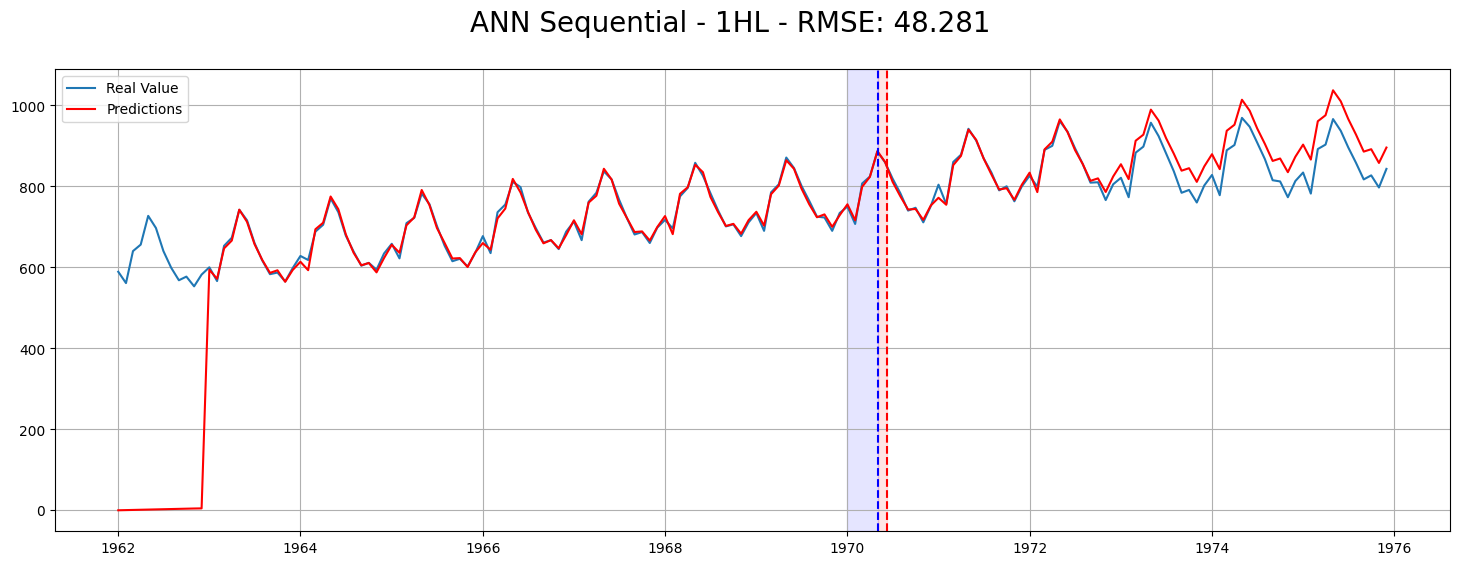

In [90]:
# Model
MODEL = 'ANN Sequential - 1HL'

# Defining the ANN
N1 = 100

ann_seq_1 = keras.models.Sequential([
    
    keras.layers.Dense(N1, activation="relu", input_shape = (1,WINDOW_SIZE-1)),
    
    keras.layers.Dense(1)
])
ann_seq_1.compile(loss="mean_squared_error", optimizer="adam")

# Training model
ann_seq_1.fit(X_train, y_train, epochs=20)
# Preparing datasets without shuffle
X_train_seq1, y_train_seq1 = prep_ts(train_tf, WINDOW_SIZE_TF, shuffle=False)
X_test_seq1, y_test_seq1 = prep_ts(test_tf, WINDOW_SIZE_TF, shuffle=False)

X_train_seq1 = np.reshape(X_train_seq1, (X_train_seq1.shape[0], 1, X_train_seq1.shape[1]))
X_test_seq1 = np.reshape(X_test_seq1, (X_test_seq1.shape[0], 1, X_test_seq1.shape[1]))
# Get Test Set Predictions
predict_train = ann_seq_1.predict(X_train_seq1)
predict_test = ann_seq_1.predict(X_test_seq1)
# Reverting from standardization
predict_train = scaler.inverse_transform(predict_train.reshape(-1, 1))
y_train_seq1 = scaler.inverse_transform(y_train_seq1.reshape(-1, 1))

predict_test = scaler.inverse_transform(predict_test.reshape(-1, 1))
y_test_seq1 = scaler.inverse_transform(y_test_seq1.reshape(-1, 1))
#Get RMSE from Test Set
rmse = np.sqrt(mean_squared_error(y_test_seq1.reshape(-1), predict_test.reshape(-1)))
# Get predictions from whole set
pred_train = np.concatenate(predict_train, axis=0).flatten()
pred_test = np.concatenate(predict_test, axis=0).flatten()
predictions = np.concatenate((pred_train, pred_test))
y_train_seq1 = np.concatenate(y_train_seq1, axis=0).flatten()
y_test_seq1 = np.concatenate(y_test_seq1, axis=0).flatten()
# Visualization
figure(figsize=(18, 6))

plt.plot(real_plot, label='Real Value')
plt.plot(pred_plot, label='Predictions', color='red')
plt.suptitle(MODEL + ' - RMSE: ' + str(np.round(rmse, 3)), fontsize=20)
plt.legend();

plt.axvline(len(predict_train)-1, linestyle='--', color='blue');
plt.axvline(len(predict_train)-1+len(predict_test), linestyle='--', color='red');

plt.axvspan(0, len(predict_train)-1, alpha=0.1, color='blue');
plt.axvspan(len(predict_train)-1, len(predict_train)+len(predict_test)-1, alpha=0.1, color='red');

plt.grid()
# Add to comparative table
model_comparative = AddModel(MODEL, rmse, model_comparative)
model_comparative.sort_values(by=['RMSE'], ascending=True)

PREDICCION PROPHET

In [92]:
import plotly.graph_objects as go

In [93]:
# Model
MODEL = 'Facebook Prophet'

# Parameters
seasonality_mode = True
daily_seasonality = False
weekly_seasonality = False
montly_seasonality = False
yearly_seasonality = True
decomposition_model = 'multiplicative'

In [98]:
# Preparing time series for Prophet
real_prophet = pd.DataFrame()
real_prophet['ds'] = real.index
real_prophet['y'] = real['Production'].values

train_prophet, valid_prophet, test_prophet = splitSet(real_prophet)
train_prophet = pd.concat([train_prophet, valid_prophet], axis=0)
